<table align="center" width=100%>
    <tr>
        <td width="25%">
            <img src="https://monophy.com/media/3o7aD3LftJ423GBsVG/monophy.gif">
        </td>
        <td>
            <div align="center">
                <font color="#0B2F02" size=24px>
                    <b>Carbon Dioxide Emissions
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement  🚚🏭

**To predict the Carbon Dioxide emissions from a vehicle in Canada depending on the fuel consumption and other describing features of a vehicle.**

<table>
    <tr>
        <td>
            <img src="https://i.gifer.com/6FR.gif">
        </td>
    </tr>
</table>

# Data Dictionary

1. **Make**  → Company of the vehicle
2. **Model**  → Car model
3. **Vehicle_Class**  → Class of vehicle depending on their utility, capacity and weight
4. **Engine_Size**  → Size of engine in terms of Litre
5. **Cylinders**  → Number of cylinders
6. **Transmission**  → Transmission type with number of gears
7. **Fuel_Type**  → Type of Fuel used
8. **Fuel_Consumption_City**  → Fuel consumption in city roads (L/100 km) 
9. **Fuel_Consumption_Hwy**  → Fuel consumption in Hwy roads (L/100 km)
10. **Fuel_Consumption_Comb**  → The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
11. **Fuel_Consumption_Comb1**   → The combined fuel consumption in both city and highway is shown in mile per gallon(mpg)
12. **CO2_Emissions**   → The tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving (Target/dependent variable)

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
        - 4.1.5 - [Indexing](#indexing)
        - 4.1.6 - [Final Dataset](#final_dataset)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
        - 4.2.4 - [Anaylze Target Variable](#analyze_tar_var)
        - 4.2.5 - [Analyze Relationship Between Target and Independent Variables](#analyze_tar_ind_var)
        - 4.2.6 - [Feature Engineering](#feature_eng)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Outliers](#out)
        - 5.1.1 - [Discovery of Outliers](#dis_out)
        - 5.1.2 - [Removal of Outliers](#rem_out)
        - 5.1.3 - [Rechecking of Correlation](#rec_cor)
    - 5.2 - [Categorical Encoding](#cat_enc)
6. **[Building Multiple Linear Regression Models](#bui_mlr_mod)**
    - 6.1 - [Multiple Linear Regression - Basic Model](#bas_mod)
    - 6.2 - [Feature Transformation](#fea_tra)
    - 6.3 - [Feature Scaling](#fea_sca)
    - 6.4 - [Multiple Linear Regression - Full Model - After Feature Scaling](#mod_aft_sca)
    - 6.5 - [Assumptions Before Multiple Linear Regression Model](#ass_bef)
        - 6.5.1 - [Assumption #1: If Target Variable is Numeric](#tgt_num)
        - 6.5.2 - [Assumption #2: Presence of Multi-Collinearity](#pre_mul_col)
    - 6.6 - [Multiple Linear Regression - Full Model - After PCA](#mod_pca)
    - 6.7 - [Feature Selection](#fea_sel)
        - 6.7.1 - [Forward Selection](#for_sel)
        - 6.7.2 - [Backward Elimination](#bac_eli)
    - 6.8 - [Multiple Linear Regression - Full Model - After Feature Selection](#mod_fea_sel)
    - 6.9 - [Assumptions After Multiple Linear Regression Model](#ass_aft)
        - 6.9.1 - [Assumption #1: Linear Relationship Between Dependent and Independent Variable](#lr_dep_ind)
        - 6.9.2 - [Assumption #2: Checking for Autocorrelation](#che_aut_cor)
        - 6.9.3 - [Assumption #3: Checking for Heterskedacity](#che_het)
        - 6.9.4 - [Assumption #4: Test for Normality](#tes_nor)
            - 6.9.4.1 - [Q-Q Plot](#qq_plt)
            - 6.9.4.2 - [Shapiro Wilk Test](#sha_wil_tes)
7. **[Model Evaluation](#mod_eva)**
    - 7.1 - [Measures of Variation](#mea_var)
    - 7.2 - [Inferences about Intercept and Slope](#inf_int_slo)
    - 7.3 - [Confidence Interval for Intercept and Slope](#con_int_slo)
    - 7.4 - [Compare Regression Results](#com_reg_res)
8. **[Model Performance](#mod_per)**
    - 8.1 - [Mean Square Error(MSE)](#mse)
    - 8.2 - [Root Mean Squared Error(RMSE)](#rmse)
    - 8.3 - [Mean Absolute Error(MAE)](#mae)
    - 8.4 - [Mean Absolute Percentage Error(MAPE)](#mape)
    - 8.5 - [Resultant Table](#res_tab)
9. **[Model Optimization](#mod_opt)**
    - 9.1 - [Bias](#bias)
    - 9.2 - [Variance](#var)
    - 9.3 - [Model Validation](#mod_val)
      - 9.3.1 - [Cross Validation](#cro_val)
      - 9.3.2 - [Leave One Out Cross Validation(LOOCV)](#loocv)
    - 9.4 - [Gradient Descent](#gra_des)
    - 9.5 - [Regularization](#reg)
      - 9.5.1 - [Ridge Regression Model](#ridge)
      - 9.5.2 - [Lasso Regression Model](#lasso)
      - 9.5.3 - [Elastic Net Regression Model](#ela_net)
      - 9.5.4 - [Grid Search CV](#gri_sea)
10. **[Displaying Score Summary](#dis_sco_sum)**
11. **[Conclusion](#conclu)**
12. **[Deployment](#deploy)**
13. **[References](#Refer)**

# 1. Import Libraries <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
from sklearn.preprocessing import MinMaxScaler
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn import preprocessing

# 2. Set Options <a id='set_options'></a>

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [3]:
# read csv file using pandas
data = pd.read_csv('../input/co2-emissions-cannada/CO2 Emissions_Canada.csv')

# display the top 5 rows of the dataframe
data.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
0,ACURA,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196
1,ACURA,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7384 entries, 0 to 7383
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    7384 non-null   object 
 1   Model                   7384 non-null   object 
 2   Vehicle_Class           7384 non-null   object 
 3   Engine_Size             7384 non-null   float64
 4   Cylinders               7384 non-null   int64  
 5   Transmission            7384 non-null   object 
 6   Fuel_Type               7384 non-null   object 
 7   Fuel_Consumption_City   7384 non-null   float64
 8   Fuel_Consumption_Hwy    7384 non-null   float64
 9   Fuel_Consumption_Comb   7384 non-null   float64
 10  Fuel_Consumption_Comb1  7384 non-null   int64  
 11  CO2_Emissions           7384 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 692.4+ KB


# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [5]:
# shape returns the dimension of the data
data.shape

(7384, 12)

In this dataset I have 7384 records across 12 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [6]:
data.dtypes

Make                       object
Model                      object
Vehicle_Class              object
Engine_Size               float64
Cylinders                   int64
Transmission               object
Fuel_Type                  object
Fuel_Consumption_City     float64
Fuel_Consumption_Hwy      float64
Fuel_Consumption_Comb     float64
Fuel_Consumption_Comb1      int64
CO2_Emissions               int64
dtype: object

The dataset contains **5 object columns, 3 int column and 4 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [7]:
missing_value = pd.DataFrame({
    'Missing Value': data.isnull().sum(),
    'Percentage': (data.isnull().sum() / len(data))*100
})

In [8]:
missing_value.sort_values(by='Percentage', ascending=False)

,Missing Value,Percentage
Make,0,0.000000
Model,0,0.000000
Vehicle_Class,0,0.000000
Engine_Size,0,0.000000
Cylinders,0,0.000000
Transmission,0,0.000000
Fuel_Type,0,0.000000
Fuel_Consumption_City,0,0.000000
Fuel_Consumption_Hwy,0,0.000000
Fuel_Consumption_Comb,0,0.000000


There are **no missing values** present in this dataset

**Visualising missing values using Heatmap**

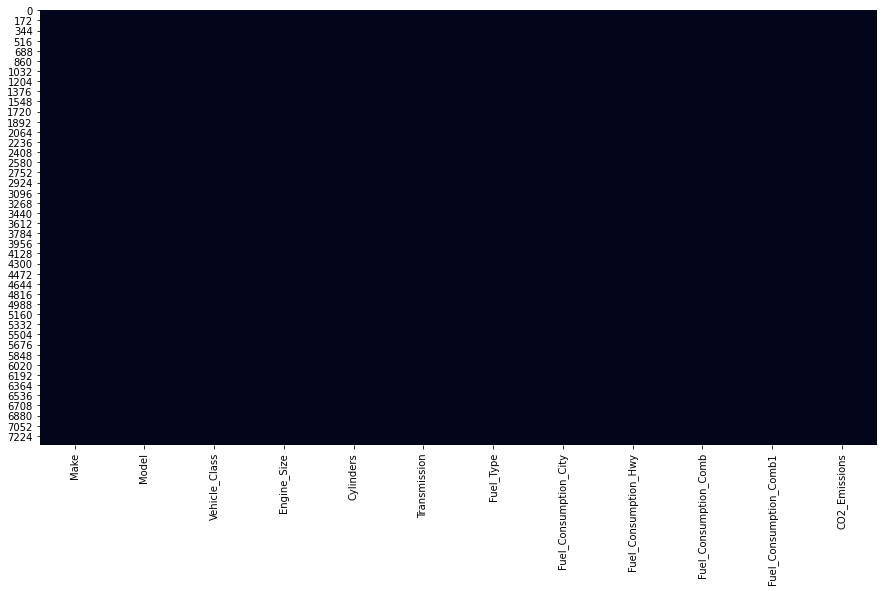

In [9]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(data.isnull(), cbar=False)

# display the plot
plt.show()

**Visual proof that there are no missing values**

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [10]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


**Getting rid of duplicate data**

In [11]:
data.drop_duplicates(inplace=True)

**Checking for duplicate data after removal of duplicates**

In [12]:
duplicate = data.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


### 4.1.5 Indexing <a id='indexing'></a>

In [13]:
data.shape

(6281, 12)

There are **6281 records** after dropping duplicates

In [14]:
data.tail()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
7379,VOLVO,XC40 T5 AWD,SUV - SMALL,2.000000,4,AS8,Z,10.700000,7.700000,9.400000,30,219
7380,VOLVO,XC60 T5 AWD,SUV - SMALL,2.000000,4,AS8,Z,11.200000,8.300000,9.900000,29,232
7381,VOLVO,XC60 T6 AWD,SUV - SMALL,2.000000,4,AS8,Z,11.700000,8.600000,10.300000,27,240
7382,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.000000,4,AS8,Z,11.200000,8.300000,9.900000,29,232
7383,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.000000,4,AS8,Z,12.200000,8.700000,10.700000,26,248


**The last 5 index values range from 7379-7383 but I have only 6281 records thus the indexes need to be reset**

In [15]:
data.reset_index(inplace=True)

In [16]:
data.tail()

,index,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
6276,7379,VOLVO,XC40 T5 AWD,SUV - SMALL,2.000000,4,AS8,Z,10.700000,7.700000,9.400000,30,219
6277,7380,VOLVO,XC60 T5 AWD,SUV - SMALL,2.000000,4,AS8,Z,11.200000,8.300000,9.900000,29,232
6278,7381,VOLVO,XC60 T6 AWD,SUV - SMALL,2.000000,4,AS8,Z,11.700000,8.600000,10.300000,27,240
6279,7382,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.000000,4,AS8,Z,11.200000,8.300000,9.900000,29,232
6280,7383,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.000000,4,AS8,Z,12.200000,8.700000,10.700000,26,248


**The indexes have been reset but a new column 'index' is created which needs to be dropped**

In [17]:
data.drop(['index'],inplace=True,axis=1)

### 4.1.6 Final Dataset <a id='final_dataset'></a>

In [18]:
data.head()

,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
0,ACURA,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196
1,ACURA,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221
2,ACURA,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244


In [19]:
data.shape

(6281, 12)

The final dataset has **6281 records and 12 features with no missing and duplicate values**

## 4.2 Understanding the Dataset <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

**Numeric Variables**

In [20]:
data.describe(include=np.number)

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
count,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000,6281.000000
mean,3.161742,5.618851,12.609807,9.070514,11.017609,27.411877,251.163827
std,1.365299,1.846391,3.553199,2.279059,2.947034,7.245573,59.293191
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


<br>Inferences:</br>
<br>1. The average amount of CO2 emitted from cars is 251 g/km</br>
<br>2. Atleast 4 Litres of fuel is consumed be it the car is on city roads or highway</br>
<br>3. About 75% of the cars have 6 or less cylinders</br>
<br>4. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway</br>

**Categorical Variables**

In [21]:
data.describe(include = object)

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6281,6281,6281,6281,6281
unique,42,2053,16,27,4
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1138,3039


<br>Inferences:</br>
<br>    1. There are a total of 42 different car companies with 2053 different car models</br>
<br>    2. Vehicles are divided into 16 different classes with SUV-Small vehicles frequenting the most</br>
<br>    3. 4 different types of fuels used by cars have been identified and fuel X seems to be the most famous</br>
<br>    4. Most of the cars have AS6 transmission</br>

### 4.2.2 Correlation <a id='correlation'></a>

In [22]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
data_num_features = data.select_dtypes(include=np.number)

# print the names of the numeric variables 
print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emissions'],
      dtype='object')


In [23]:
# generate the correlation matrix
corr =  data_num_features.corr()

# print the correlation matrix
corr

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
Engine_Size,1.000000,0.928843,0.834233,0.766816,0.820145,-0.762957,0.854870
Cylinders,0.928843,1.000000,0.801290,0.717645,0.781104,-0.723741,0.834739
Fuel_Consumption_City,0.834233,0.801290,1.000000,0.950832,0.994054,-0.927634,0.918900
Fuel_Consumption_Hwy,0.766816,0.717645,0.950832,1.000000,0.978618,-0.891912,0.883475
Fuel_Consumption_Comb,0.820145,0.781104,0.994054,0.978618,1.000000,-0.925798,0.916953
Fuel_Consumption_Comb1,-0.762957,-0.723741,-0.927634,-0.891912,-0.925798,1.000000,-0.906929
CO2_Emissions,0.854870,0.834739,0.918900,0.883475,0.916953,-0.906929,1.000000


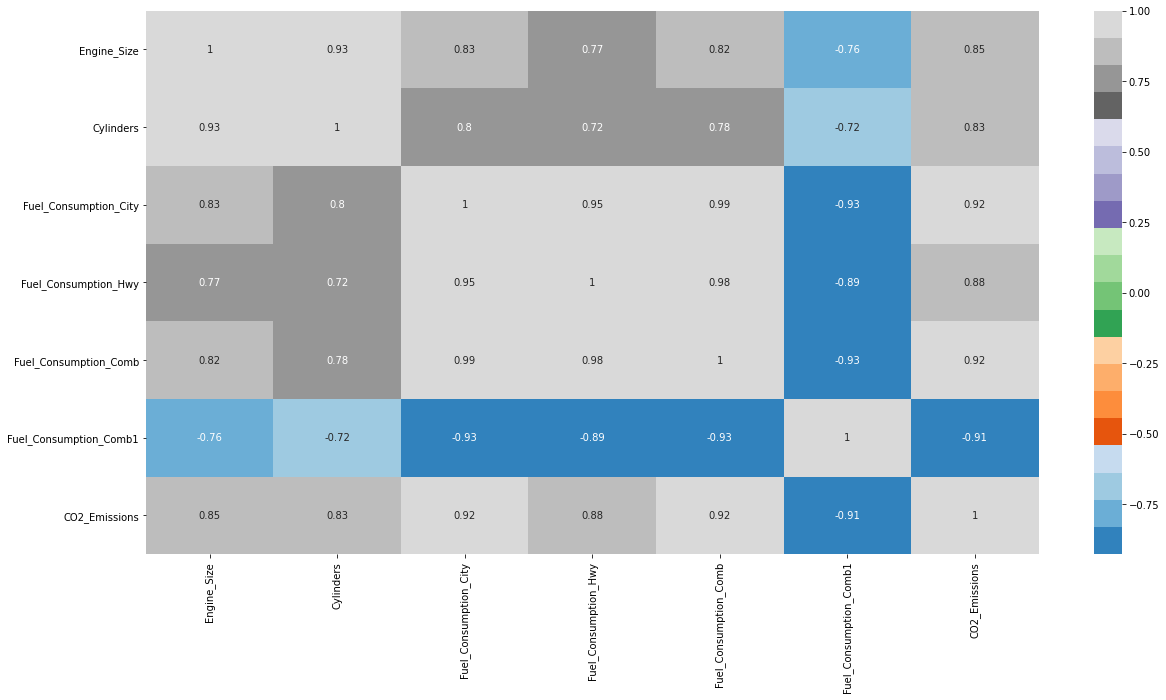

In [24]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20c')
plt.show()

<br>Inferences:</br>
<br>    1. Fuel_Consumption_Comb1 has a high negative correaltion(<-0.9) with CO2_Emissions, Fuel_Consumption_Comb and Fuel_Consumption_City</br>
<br>    2. CO2_Emissions has high positive correlation(>0.9) with Fuel_Consumption_Comb and Fuel_Consumption_City</br>

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

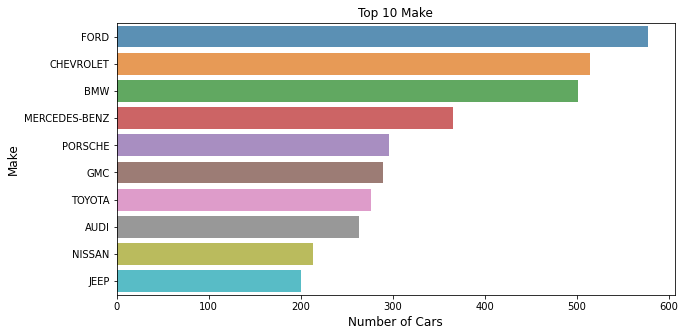

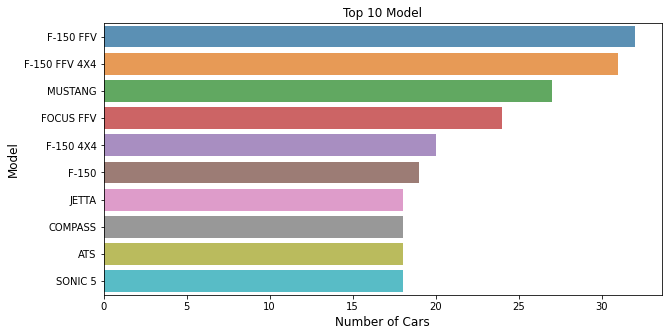

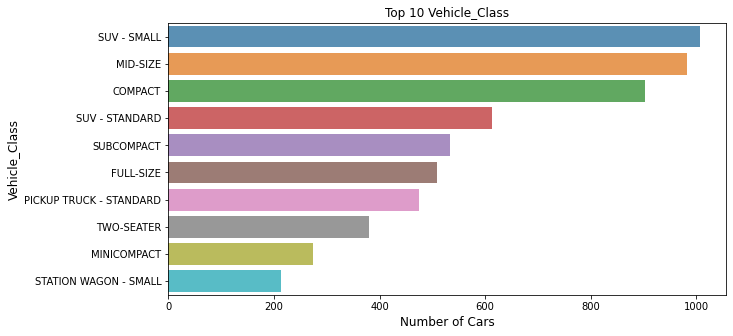

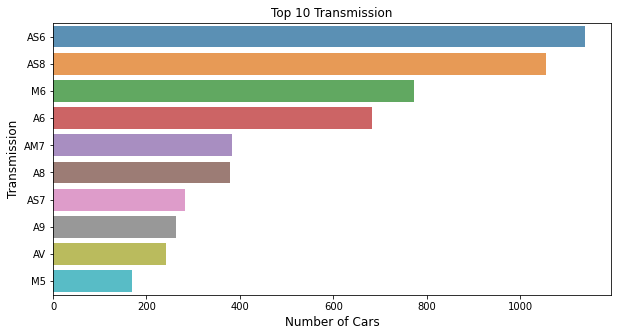

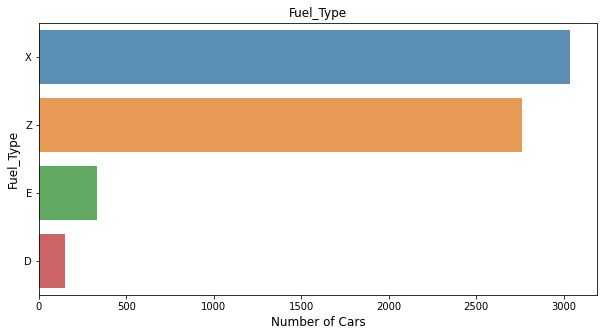

<Figure size 432x288 with 0 Axes>

In [25]:
# create a list of all categorical variables
# include=object: selects the categoric features
# drop(['city'],axis=1): drops the city column from the dataframe
data_cat_features = data.select_dtypes(include='object')

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
# plot a count plot for all the categorical variables
for variable in data_cat_features:
    
    cat_count  = data[variable].value_counts()
    cat_count10 = cat_count[:10,]
    plt.figure(figsize=(10,5))
    sns.barplot(cat_count10.values,cat_count10.index, alpha=0.8)
    if cat_count.size > 10:
        plt.title('Top 10 {}'.format(variable))
    else:
        plt.title(variable)
    plt.ylabel('{}'.format(variable), fontsize=12)
    plt.xlabel('Number of Cars', fontsize=12)
    plt.show()

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

<br>Inferences from each Plot:</br>
<br>    1. Top 10 Make: Most of the cars on Canadian roads are made by Ford</br>
<br>    2. Top 10 Model: The F-150 FFV is amongst the most famous models driven in Canada</br>
<br>    3. Top 10 Vehicle_Class: SUV-Small is the preferred class of vehicle amongst the Canadians</br>
<br>    4. Top 10 Transmission: More than 1000 cars have AS6 and AS8 transmission types</br>
<br>    5. Fuel Type: Majority of the cars in Canada use Fuel type X and Z</br>

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

<AxesSubplot:xlabel='Carbon Dioxide Emission (30 bins)', ylabel='Density'>

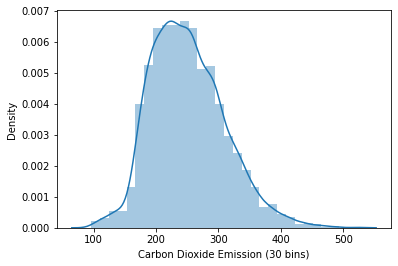

In [26]:
sns.distplot(data['CO2_Emissions'], bins=30, kde=True, axlabel='Carbon Dioxide Emission (30 bins)')

From the above histogram, I can see that CO2_Emissions is moderately positive skewed

In [27]:
mean = data['CO2_Emissions'].mean()

# calculate the mode
mode = data['CO2_Emissions'].mode()

# calculate the median
median = data['CO2_Emissions'].median()

print('Mean for CO2 Emission is ',mean)
print('Median for CO2 Emission is ',median)
print('Mode for CO2 Emission is ',mode)

Mean for CO2 Emission is  251.16382741601655
Median for CO2 Emission is  246.0
Mode for CO2 Emission is  0    221
1    246
dtype: int64


CO2_Emissions is bi-modal in nature

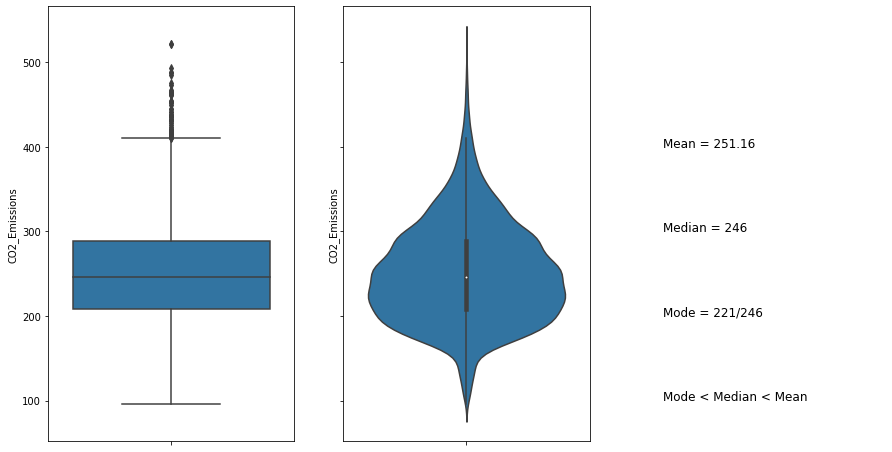

In [28]:
# create two plots in single figure
# I define two axes by passing the value 3 to the subplot function
# sharey returns the y axis label
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,8))

# create a boxplot
# orient="v": create a vertical plot
# ax = axes: axes object to draw plot
# I use axes[0] to use the first axes for plotting
sns.boxplot(y=data['CO2_Emissions'], orient="v", ax = axes[0])

# create a violinplot
# orient="v": create a vertical plot
# ax = axes: axes object to draw plot
# I use axes[1] to use the second axes for plotting
sns.violinplot(y=data['CO2_Emissions'], orient="v", ax = axes[1]);

# add a value of mode in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 200, "Mode = 221/246", fontsize=12)

# add a value of median in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 300, "Median = 246", fontsize=12)

# add a value of mean in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 400, "Mean = 251.16", fontsize=12)

# add the result in the empty subplot
# fontsize: font size of the text
plt.text(0.1, 100, "Mode < Median < Mean", fontsize=12)

# remove the axis for the third subplot
plt.axis("off")

# show the plot
plt.show()

Of all the three statistics, the mean is the largest, while the mode is the smallest thus CO2_Emissions is positively skewed which implies that most of the CO2 Emissions are less than the average CO2 Emissions.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

In [29]:
make_co2 = data.groupby('Make')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
model_co2 = data.groupby('Model')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
vehicle_class_co2 = data.groupby('Vehicle_Class')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
transmission_co2 = data.groupby('Transmission')['CO2_Emissions'].mean().sort_values(ascending=False).head(10)
fuel_type_co2 = data.groupby('Fuel_Type')['CO2_Emissions'].mean().sort_values(ascending=False).head()

Text(0.5, 1.0, 'CO2 Emissions v/s Fuel Type')

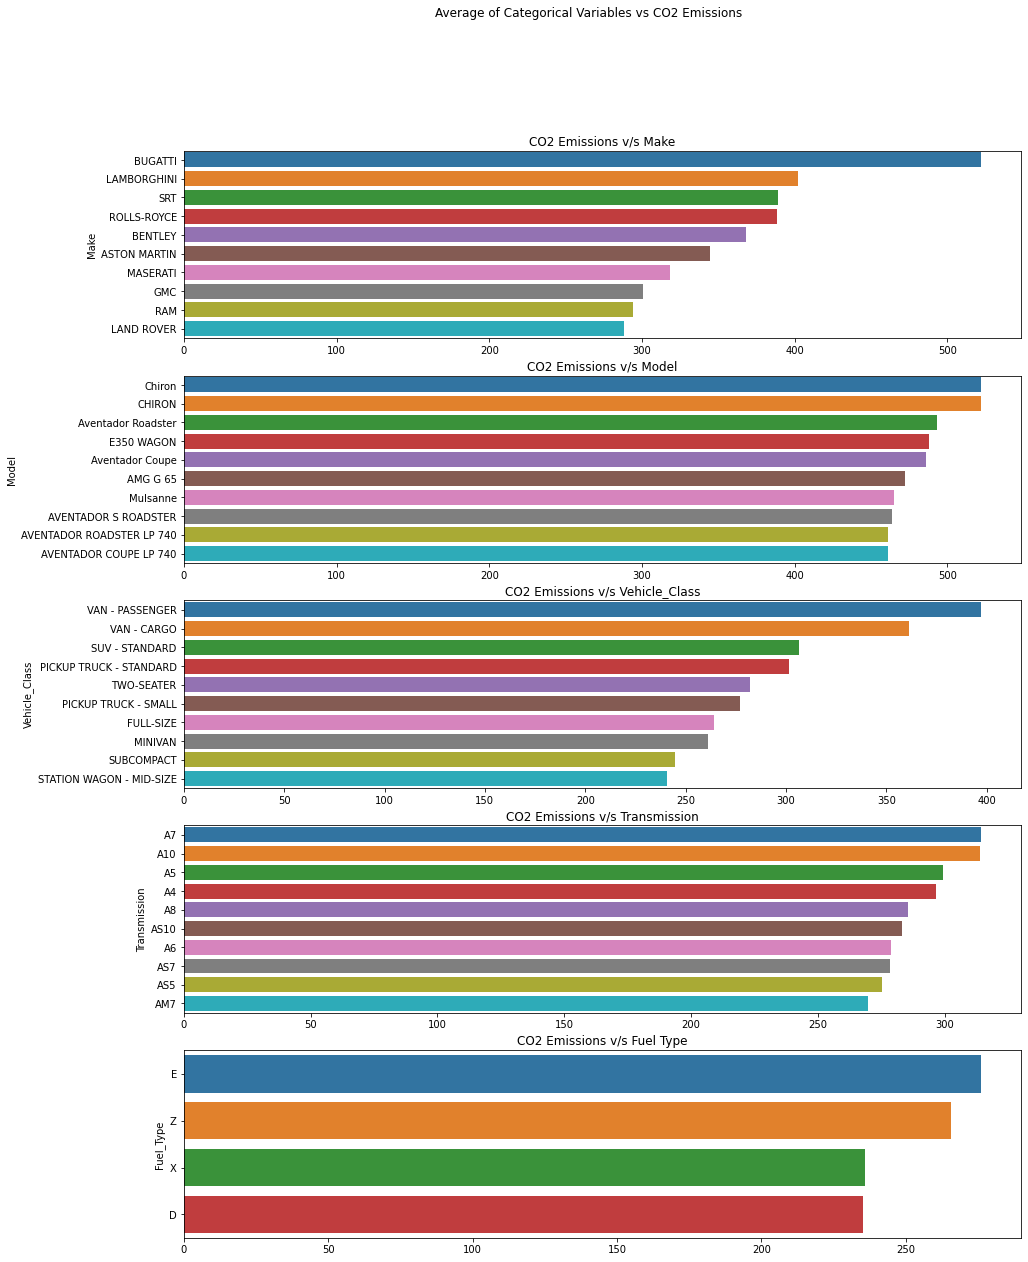

In [30]:
fig, axes = plt.subplots(5,1, figsize=(15,20))
fig.suptitle('Average of Categorical Variables vs CO2 Emissions')

sns.barplot(ax=axes[0],x = make_co2.values,y = make_co2.index)
axes[0].set_title('CO2 Emissions v/s Make')

sns.barplot(ax=axes[1],x = model_co2.values,y = model_co2.index)
axes[1].set_title('CO2 Emissions v/s Model')

sns.barplot(ax=axes[2],x = vehicle_class_co2.values,y = vehicle_class_co2.index)
axes[2].set_title('CO2 Emissions v/s Vehicle_Class')

sns.barplot(ax=axes[3],x = transmission_co2.values,y = transmission_co2.index)
axes[3].set_title('CO2 Emissions v/s Transmission')

sns.barplot(ax=axes[4], x=fuel_type_co2.values,y=fuel_type_co2.index)
axes[4].set_title('CO2 Emissions v/s Fuel Type')

<br>Inferences from each Plot:</br>
<br>    1. CO2 Emissions v/s Make: While Ford cars are mainly found on the roads of Canada , its Bugatti that emit the most CO2 per car</br>
<br>    2. CO2 Emissions v/s Model: Bugatti Chiron is amongst the most CO2 emitting car model</br>
<br>    3. CO2 Emissions v/s Vehicle_Class: Most of the heavy vehicles like Vans , SUV and Pick-up truck are amongst the top few emitters of CO2</br>
<br>    4. CO2 Emissions v/s Transmission: Most of the cars with automatic transmission emit CO2</br>
<br>    5. CO2 Emissions v/s Fuel_Type: Cars using Fuel Type E are emitting the most CO2</br>

**Let's check the relationship between Cylinders and CO2 Emissions**

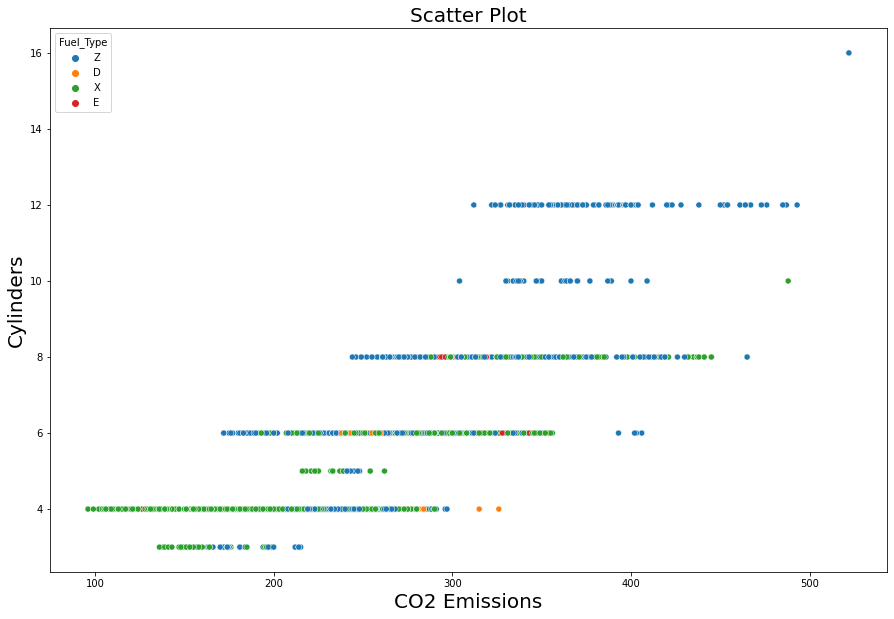

In [31]:
# plot the scatter plot
# use 'hue' to add 3rd variable in the scatter plot
plt.rcParams["figure.figsize"] = (15,10)
sns.scatterplot('CO2_Emissions','Cylinders',data = data,hue='Fuel_Type')

# set label for x-axis
plt.xlabel("CO2 Emissions", fontsize=20)

# set label for y-axis
plt.ylabel("Cylinders", fontsize=20)

# set title
plt.title("Scatter Plot", fontsize=20)

# display the plot
plt.show()

<br>From the above scatter plot i can see that:</br>
<br>    1. As the number of cylinders increase, the CO2 emissions increase</br>
<br>    2. Cars with 8 and less than 8 cylinders prefer using Fuel Type X which result in less emissions of CO2</br>
<br>    3. Fuel Type Z results in more CO2 emissions than the other</br>

<Figure size 720x360 with 0 Axes>

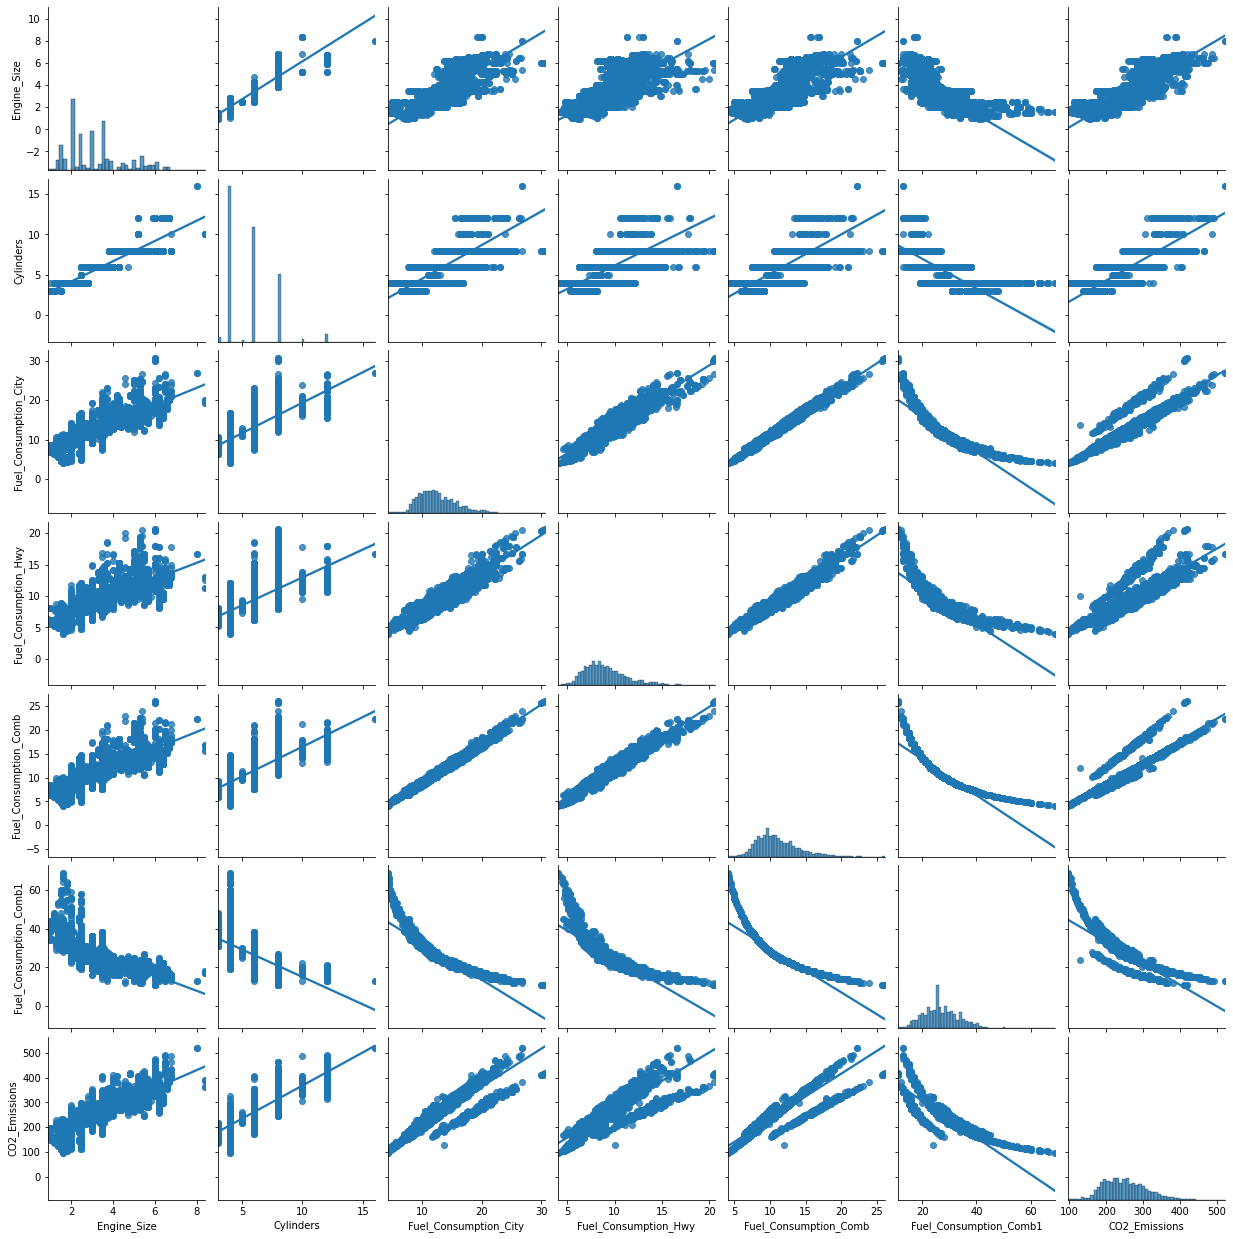

In [32]:
plt.figure(figsize=(10,5))
sns.pairplot(data,kind="reg")
plt.show()

Inferences:
    1. Fuel_Consumption_Comb1 shows a negative relation with all the other numerical variables
    2. Fuel_Consumption_City and Fuel_Consumption_Hwy are strongly postively related

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

**Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality**

**There are 42 unique Car Companies. I will divide these companies into Luxury, Sports, Premium and General cars**

In [33]:
data['Make_Type'] = data['Make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI',
                                                       'JAGUAR','SRT'],
                                                      'Sports')

In [34]:
data['Make_Type'] = data['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK',
                                                         'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC',
                                                         'INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ',
                                                         'MINI', 'SMART', 'VOLVO'],
                                                         'Premium')

In [35]:
data['Make_Type'] = data['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',
                                                         'GENESIS'],
                                                         'Luxury')

In [36]:
data['Make_Type'] = data['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA',
                                                         'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI',
                                                         'NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA',
                                                         'VOLKSWAGEN'],
                                                         'General')

In [37]:
data['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [38]:
data['Make_Type'].value_counts()

General    2775
Premium    2731
Sports      546
Luxury      229
Name: Make_Type, dtype: int64

In [39]:
#Drop Make column
data = data.drop(['Make'], axis=1)

In [40]:
data.head()

,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Make_Type
0,ILX,COMPACT,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196,Luxury
1,ILX,COMPACT,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221,Luxury
2,ILX HYBRID,COMPACT,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136,Luxury
3,MDX 4WD,SUV - SMALL,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255,Luxury
4,RDX AWD,SUV - SMALL,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244,Luxury


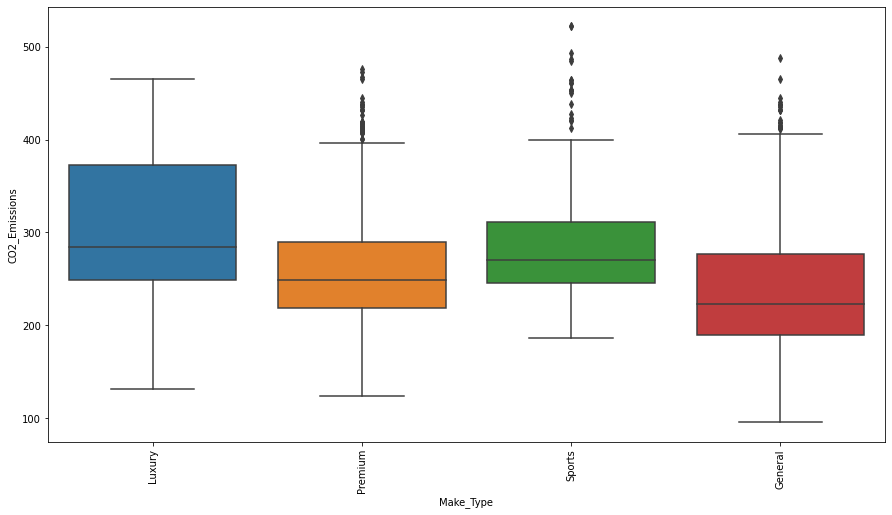

In [41]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="Make_Type", y="CO2_Emissions", data=data)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

The plot shows that Sports cars and Luxury cars emit more CO2 compared to Premium and General use cars

**Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size**

**There are 16 unique Vehicle Classes. I will divide them into Hatchback, Sedan, SUV and Truck**

In [42]:
data['Vehicle_Class_Type'] = data['Vehicle_Class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'],
                                                      'Hatchback')

In [43]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
                                                         'STATION WAGON - MID-SIZE'],
                                                         'Sedan')

In [44]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],
                                                         'SUV')

In [45]:
data['Vehicle_Class_Type'] = data['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE',
                                                         'PICKUP TRUCK - SMALL'],
                                                         'Truck')

In [46]:
# check the unique values of the Make_Type column
data['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [47]:
data['Vehicle_Class_Type'].value_counts()

Sedan        2130
Hatchback    1710
SUV          1680
Truck         761
Name: Vehicle_Class_Type, dtype: int64

In [48]:
#Drop Vehicle_Class column
data = data.drop(['Vehicle_Class'], axis=1)

In [49]:
data.head()

,Model,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Make_Type,Vehicle_Class_Type
0,ILX,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196,Luxury,Hatchback
1,ILX,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221,Luxury,Hatchback
2,ILX HYBRID,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136,Luxury,Hatchback
3,MDX 4WD,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255,Luxury,SUV
4,RDX AWD,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244,Luxury,SUV


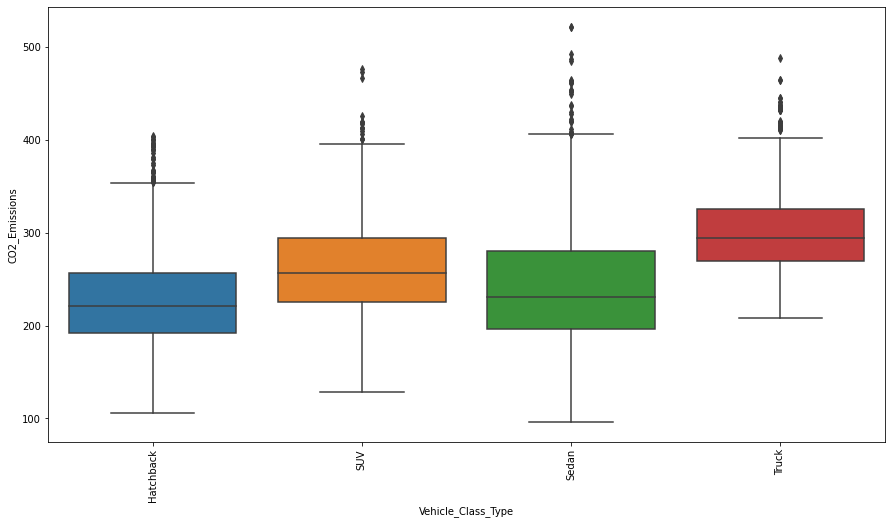

In [50]:
# set figure size
plt.figure(figsize=(15,8))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.boxplot(x="Vehicle_Class_Type", y="CO2_Emissions", data=data)

# rotate labels using set_ticklabels
# labels: specify the tick labels to be used
# rotation: the angle by which tick labels should be rotated
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

The plot shows that the bigger the cars are the more CO2 they emit

# 5. Data Preprocessing <a id='data_pre'></a>

In [51]:
data.drop(['Model'],axis=1,inplace=True)

Since Model has 2053 unique values and has no significance with respect to CO2 Emissions , I have dropped this column

In [52]:
data.head()

,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Make_Type,Vehicle_Class_Type
0,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196,Luxury,Hatchback
1,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221,Luxury,Hatchback
2,1.500000,4,AV7,Z,6.000000,5.800000,5.900000,48,136,Luxury,Hatchback
3,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255,Luxury,SUV
4,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244,Luxury,SUV


## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [53]:
df_num_features=data.select_dtypes(include=np.number)

**Identifying outliers using IQR**

In [54]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Engine_Size               1.700000
Cylinders                 2.000000
Fuel_Consumption_City     4.600000
Fuel_Consumption_Hwy      2.800000
Fuel_Consumption_Comb     3.800000
Fuel_Consumption_Comb1   10.000000
CO2_Emissions            81.000000
dtype: float64


In [55]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

In [56]:
for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column Engine_Size are 121
Total number of Outliers in column Cylinders are 177
Total number of Outliers in column Fuel_Consumption_City are 116
Total number of Outliers in column Fuel_Consumption_Hwy are 150
Total number of Outliers in column Fuel_Consumption_Comb are 115
Total number of Outliers in column Fuel_Consumption_Comb1 are 95
Total number of Outliers in column CO2_Emissions are 74


**Visualizing outliers using Boxplots**

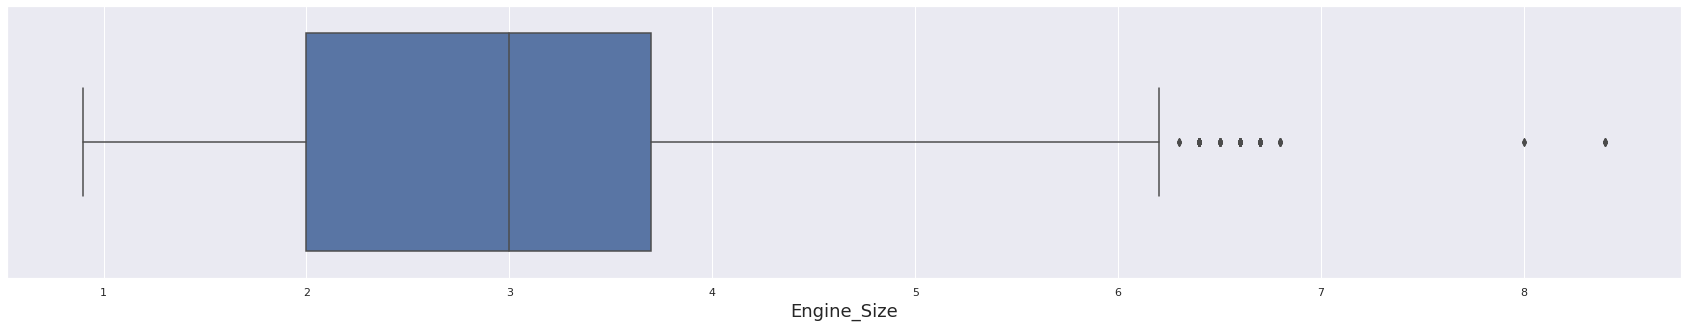

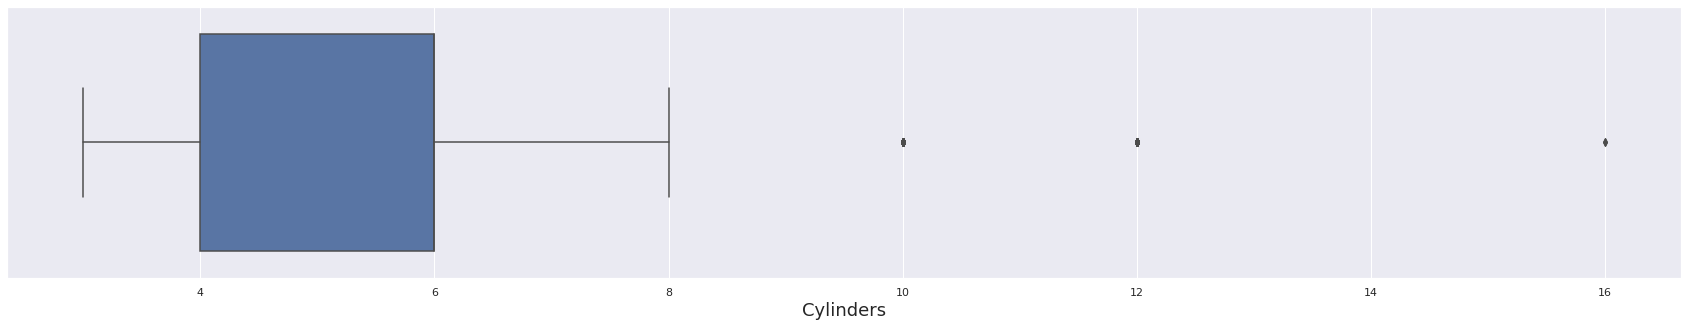

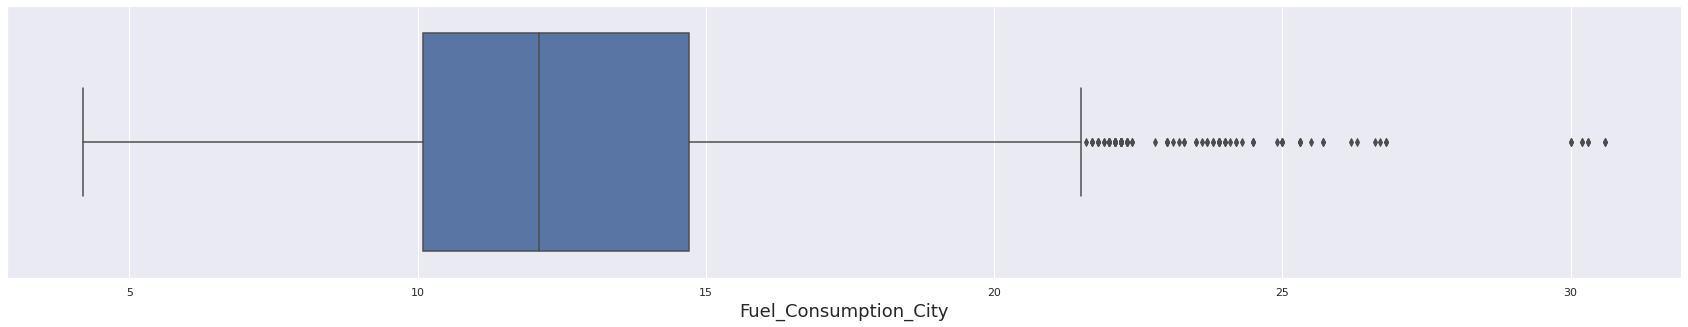

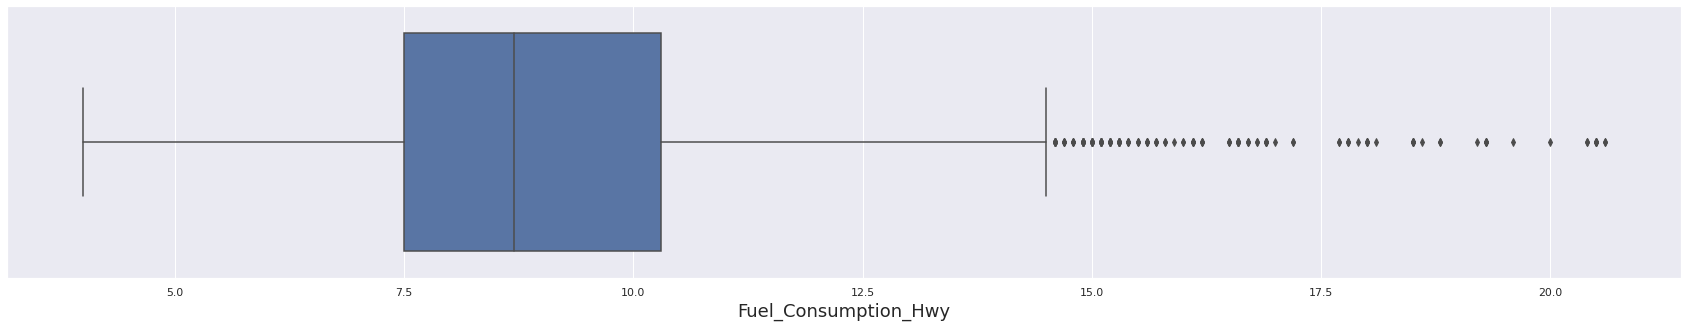

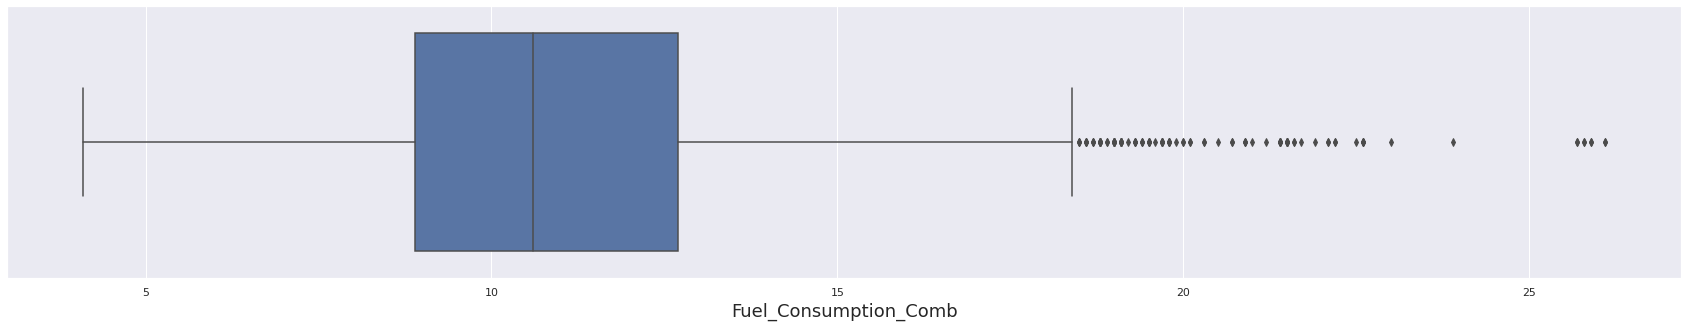

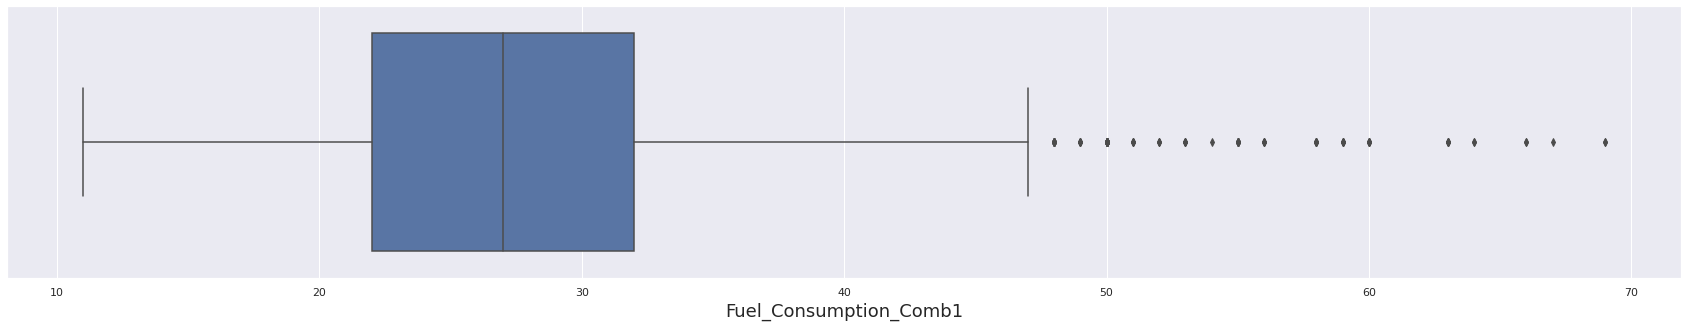

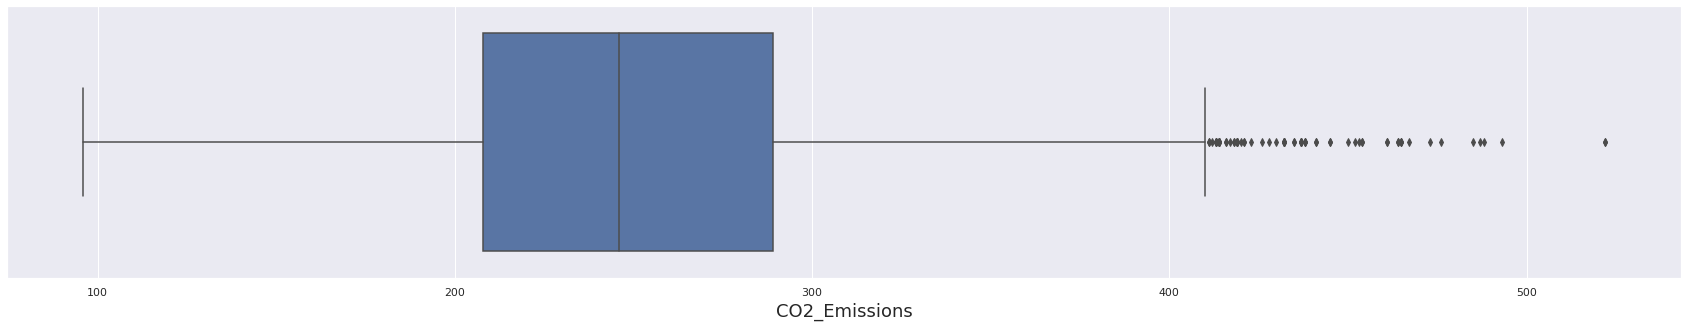

In [57]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [58]:
stat, p_value = shapiro(df_num_features)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.5185120105743408
P-Value: 0.0


Since the numeric features are not normal I am removing the outliers using IQR method

In [59]:
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(5815, 11)

In [60]:
data.reset_index(inplace=True)

In [61]:
data.drop(['index'],inplace=True,axis=1)

In [62]:
data.head()

,Engine_Size,Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Make_Type,Vehicle_Class_Type
0,2.000000,4,AS5,Z,9.900000,6.700000,8.500000,33,196,Luxury,Hatchback
1,2.400000,4,M6,Z,11.200000,7.700000,9.600000,29,221,Luxury,Hatchback
2,3.500000,6,AS6,Z,12.700000,9.100000,11.100000,25,255,Luxury,SUV
3,3.500000,6,AS6,Z,12.100000,8.700000,10.600000,27,244,Luxury,SUV
4,3.500000,6,AS6,Z,11.900000,7.700000,10.000000,28,230,Luxury,Sedan


### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

In [63]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
data_num_features = data.select_dtypes(include=np.number)

# print the names of the numeric variables 
print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption_City',
       'Fuel_Consumption_Hwy', 'Fuel_Consumption_Comb',
       'Fuel_Consumption_Comb1', 'CO2_Emissions'],
      dtype='object')


In [64]:
# generate the correlation matrix
corr =  data_num_features.corr()

# print the correlation matrix
corr

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
Engine_Size,1.000000,0.937346,0.824019,0.761397,0.813450,-0.785158,0.837139
Cylinders,0.937346,1.000000,0.804393,0.729219,0.789103,-0.766217,0.822976
Fuel_Consumption_City,0.824019,0.804393,1.000000,0.939954,0.992565,-0.960095,0.913508
Fuel_Consumption_Hwy,0.761397,0.729219,0.939954,1.000000,0.974064,-0.933722,0.896150
Fuel_Consumption_Comb,0.813450,0.789103,0.992565,0.974064,1.000000,-0.964289,0.920201
Fuel_Consumption_Comb1,-0.785158,-0.766217,-0.960095,-0.933722,-0.964289,1.000000,-0.925912
CO2_Emissions,0.837139,0.822976,0.913508,0.896150,0.920201,-0.925912,1.000000


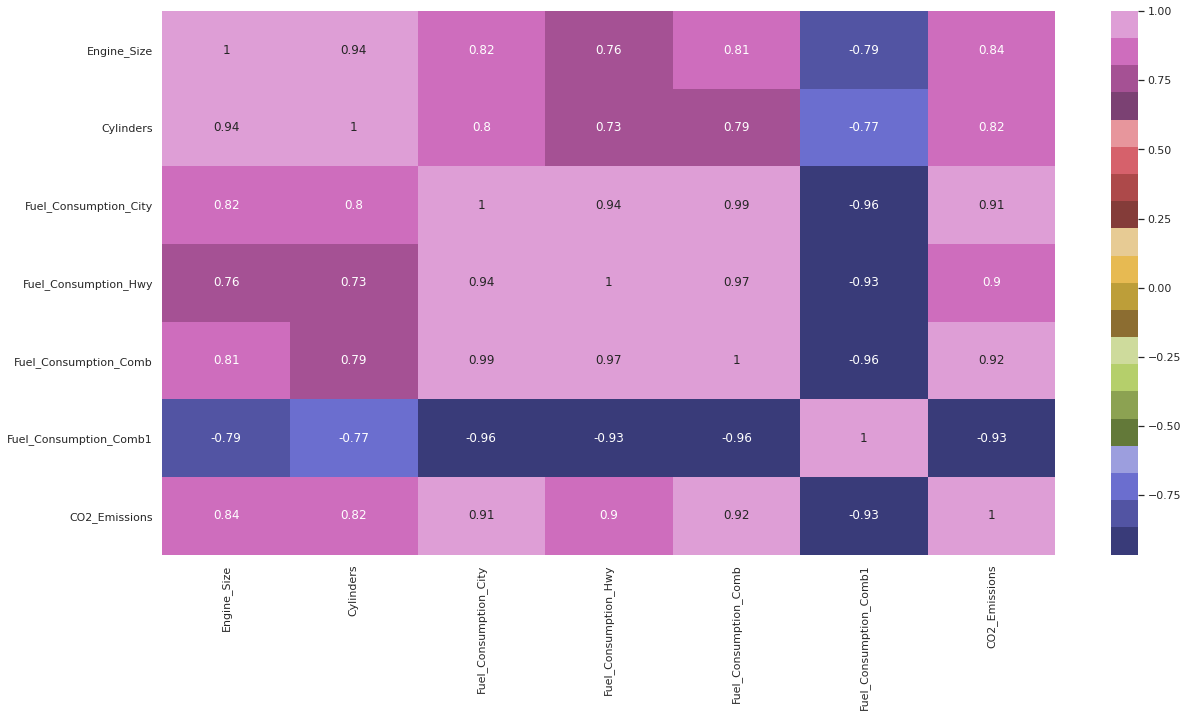

In [65]:
plt.figure(figsize=(20,10))
corr =data_num_features.corr(method='pearson')
sns.heatmap(corr, annot=True,cmap='tab20b')
plt.show()

Recheck of correlation after treating outliers. There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

**Filter the numeric and categorical features**

In [66]:
df_dummies = pd.get_dummies(data = data[["Fuel_Type","Transmission","Make_Type","Vehicle_Class_Type"]], drop_first = True)
df_dummies.head()

,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [67]:
df_num_features=data.select_dtypes(include=np.number)
df_num_features.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions
0,2.000000,4,9.900000,6.700000,8.500000,33,196
1,2.400000,4,11.200000,7.700000,9.600000,29,221
2,3.500000,6,12.700000,9.100000,11.100000,25,255
3,3.500000,6,12.100000,8.700000,10.600000,27,244
4,3.500000,6,11.900000,7.700000,10.000000,28,230


**Concatenate numerical and dummy encoded categorical variables**

In [68]:
df_comb = pd.concat([df_num_features, df_dummies], axis = 1)
df_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,CO2_Emissions,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.000000,4,9.900000,6.700000,8.500000,33,196,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2.400000,4,11.200000,7.700000,9.600000,29,221,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,3.500000,6,12.700000,9.100000,11.100000,25,255,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3.500000,6,12.100000,8.700000,10.600000,27,244,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3.500000,6,11.900000,7.700000,10.000000,28,230,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# 6. Building Multiple Linear Regression Models<a id='bui_mlr_mod'></a>

In [69]:
df_comb.drop(['CO2_Emissions'],inplace=True,axis=1)

In [70]:
df_comb.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,2.000000,4,9.900000,6.700000,8.500000,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2.400000,4,11.200000,7.700000,9.600000,29,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,3.500000,6,12.700000,9.100000,11.100000,25,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,3.500000,6,12.100000,8.700000,10.600000,27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,3.500000,6,11.900000,7.700000,10.000000,28,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [71]:
df_comb.isna().sum()

Engine_Size                 0
Cylinders                   0
Fuel_Consumption_City       0
Fuel_Consumption_Hwy        0
Fuel_Consumption_Comb       0
Fuel_Consumption_Comb1      0
Fuel_Type_E                 0
Fuel_Type_X                 0
Fuel_Type_Z                 0
Transmission_A4             0
Transmission_A5             0
Transmission_A6             0
Transmission_A7             0
Transmission_A8             0
Transmission_A9             0
Transmission_AM5            0
Transmission_AM6            0
Transmission_AM7            0
Transmission_AM8            0
Transmission_AM9            0
Transmission_AS10           0
Transmission_AS4            0
Transmission_AS5            0
Transmission_AS6            0
Transmission_AS7            0
Transmission_AS8            0
Transmission_AS9            0
Transmission_AV             0
Transmission_AV10           0
Transmission_AV6            0
Transmission_AV7            0
Transmission_AV8            0
Transmission_M5             0
Transmissi

## 6.1 Multiple Linear Regression - Basic Model<a id='bas_mod'></a>

In [72]:
X = df_comb.copy()

In [73]:
X = sm.add_constant(X)
y = data.CO2_Emissions

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model1 = sm.OLS(y_train, X_train).fit()
print(MLR_model1.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.864e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:01:52   Log-Likelihood:                -11084.
No. Observations:                4070   AIC:                         2.225e+04
Df Residuals:                    4029   BIC:                         2.251e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Interpretations:
    1. 99.5% of the variation in CO2 emissions is explained by the model.
    2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
    3. The Condition Number is 1.00e+16 which suggests that there is severe mutli-collinearity
    4. The features taken into consideration are of different scales

## 6.2 Feature Transformation<a id='fea_tra'></a>

In [75]:
df_num_features.skew()

Engine_Size              0.792633
Cylinders                0.511211
Fuel_Consumption_City    0.535743
Fuel_Consumption_Hwy     0.671570
Fuel_Consumption_Comb    0.579244
Fuel_Consumption_Comb1   0.395657
CO2_Emissions            0.393906
dtype: float64

Since the skewness is relatively low, there is no need to perform any further transformations to reduce skewness

## 6.3 Feature Scaling<a id='fea_sca'></a>

In [76]:
for col in df_num_features.columns:
    print("Column ", col, " :", stats.shapiro(df_num_features[col]))

Column  Engine_Size  : ShapiroResult(statistic=0.9220640659332275, pvalue=0.0)
Column  Cylinders  : ShapiroResult(statistic=0.7948498129844666, pvalue=0.0)
Column  Fuel_Consumption_City  : ShapiroResult(statistic=0.9760173559188843, pvalue=3.441474310280933e-30)
Column  Fuel_Consumption_Hwy  : ShapiroResult(statistic=0.9660427570343018, pvalue=6.303718747894691e-35)
Column  Fuel_Consumption_Comb  : ShapiroResult(statistic=0.9723187685012817, pvalue=4.236674715310647e-32)
Column  Fuel_Consumption_Comb1  : ShapiroResult(statistic=0.9820321798324585, pvalue=1.5653533342647732e-26)
Column  CO2_Emissions  : ShapiroResult(statistic=0.9829248189926147, pvalue=6.519728305664042e-26)


Since none of the numerical features are normally distributed (p-value<0.05) , I will perform Min-Max normalisation to scale the data

In [77]:
df_num_features.drop('CO2_Emissions',axis=1,inplace=True)

In [78]:
mms = preprocessing.MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfxz = pd.DataFrame(mms.fit_transform(df_num_features), columns = ['Engine_Size','Cylinders','Fuel_Consumption_City','Fuel_Consumption_Hwy','Fuel_Consumption_Comb','Fuel_Consumption_Comb1'])

In [79]:
dfxz.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1
0,0.207547,0.200000,0.273885,0.220000,0.206612,0.548387
1,0.283019,0.200000,0.356688,0.320000,0.297521,0.419355
2,0.490566,0.600000,0.452229,0.460000,0.421488,0.290323
3,0.490566,0.600000,0.414013,0.420000,0.380165,0.354839
4,0.490566,0.600000,0.401274,0.320000,0.330579,0.387097


In [80]:
dfxz = pd.concat([dfxz, df_dummies], axis = 1)
dfxz.head()

,Engine_Size,Cylinders,Fuel_Consumption_City,Fuel_Consumption_Hwy,Fuel_Consumption_Comb,Fuel_Consumption_Comb1,Fuel_Type_E,Fuel_Type_X,Fuel_Type_Z,Transmission_A4,Transmission_A5,Transmission_A6,Transmission_A7,Transmission_A8,Transmission_A9,Transmission_AM5,Transmission_AM6,Transmission_AM7,Transmission_AM8,Transmission_AM9,Transmission_AS10,Transmission_AS4,Transmission_AS5,Transmission_AS6,Transmission_AS7,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Make_Type_Luxury,Make_Type_Premium,Make_Type_Sports,Vehicle_Class_Type_SUV,Vehicle_Class_Type_Sedan,Vehicle_Class_Type_Truck
0,0.207547,0.200000,0.273885,0.220000,0.206612,0.548387,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.283019,0.200000,0.356688,0.320000,0.297521,0.419355,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,0.490566,0.600000,0.452229,0.460000,0.421488,0.290323,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,0.490566,0.600000,0.414013,0.420000,0.380165,0.354839,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0.490566,0.600000,0.401274,0.320000,0.330579,0.387097,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


## 6.4 Multiple Linear Regression - Full Model - After Feature Scaling<a id='mod_aft_sca'></a>

In [81]:
X=dfxz
X = sm.add_constant(X)
y = data.CO2_Emissions

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model2 = sm.OLS(y_train, X_train).fit()
print(MLR_model2.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.864e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:01:59   Log-Likelihood:                -11084.
No. Observations:                4070   AIC:                         2.225e+04
Df Residuals:                    4029   BIC:                         2.251e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Interpretations:
    1. 99.5% of the variation in CO2 emissions is explained by the model .
    2. The Durbin-Watson test statistic is 2.006 and indicates that there is no auto-correlation
    3. The Condition Number is 1.24e+16 which suggests that there is severe mutli-collinearity

## 6.5 Assumptions Before Multiple Linear Regression Model<a id="ass_bef"></a>

### 6.5.1 Assumption #1: If Target Variable is Numeric<a id="tgt_num"></a>

In [83]:
target = data['CO2_Emissions']

target.dtype

dtype('int64')

### 6.5.2 Assumption #2: Presence of Multi-Collinearity<a id="pre_mul_col"></a>

In [84]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_num_features.values, i) for i in range(df_num_features.shape[1])]

# create a column of variable names
vif["Features"] = df_num_features.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,67525.913043,Fuel_Consumption_Comb
1,26998.548013,Fuel_Consumption_City
2,9481.298617,Fuel_Consumption_Hwy
3,115.587886,Cylinders
4,65.561368,Engine_Size
5,9.889669,Fuel_Consumption_Comb1


Since all the features except Fuel_Consumption_Comb1 have a VIF value greater than 10 I cannot proceed with VIF method else I will lose all our features. Hence , I will proceed with PCA

In [85]:
sklearn_pca = PCA()
pcafit = sklearn_pca.fit(dfxz)

In [86]:
pcafit.explained_variance_

array([6.19059003e-01, 3.48288404e-01, 2.56281773e-01, 1.97546192e-01,
       1.70280024e-01, 1.51191238e-01, 1.25909228e-01, 9.80469420e-02,
       8.32351893e-02, 6.17183639e-02, 5.47345360e-02, 4.88279090e-02,
       4.26973925e-02, 3.99262043e-02, 3.67046408e-02, 3.02694761e-02,
       2.66414443e-02, 2.35029960e-02, 2.26129619e-02, 1.80923750e-02,
       1.70276225e-02, 1.47931556e-02, 1.34970459e-02, 1.20208355e-02,
       1.09696797e-02, 1.05179925e-02, 7.79159716e-03, 6.65544092e-03,
       6.14436732e-03, 5.83432168e-03, 5.18781389e-03, 4.51037060e-03,
       3.31077333e-03, 1.68326789e-03, 1.54740252e-03, 8.86383950e-04,
       7.02806399e-04, 3.69155033e-04, 2.02984779e-04, 1.39708971e-04,
       7.27502173e-06])

In [87]:
pcafit.components_

array([[ 6.77242733e-02,  1.26613091e-01,  5.92724326e-02, ...,
        -1.29980731e-01,  1.19712773e-01, -9.99524003e-02],
       [ 2.07522986e-01,  2.52331969e-01,  1.88872175e-01, ...,
         5.04043835e-01, -5.55564576e-01,  1.36139115e-01],
       [ 2.90549722e-01,  3.75166864e-01,  2.24260099e-01, ...,
        -3.80653581e-01,  1.94999607e-01,  3.30646967e-01],
       ...,
       [-2.22020814e-02,  5.40054155e-03,  2.01375378e-02, ...,
        -1.73771296e-03, -5.25507843e-04, -2.71396354e-03],
       [ 1.60840585e-02, -6.06364276e-03,  1.94820979e-02, ...,
         4.04474256e-03, -3.44700604e-04,  6.76083069e-03],
       [-2.09326901e-04,  2.53583752e-04, -5.55288344e-01, ...,
         2.56332913e-04,  3.52829920e-05,  3.22217641e-04]])

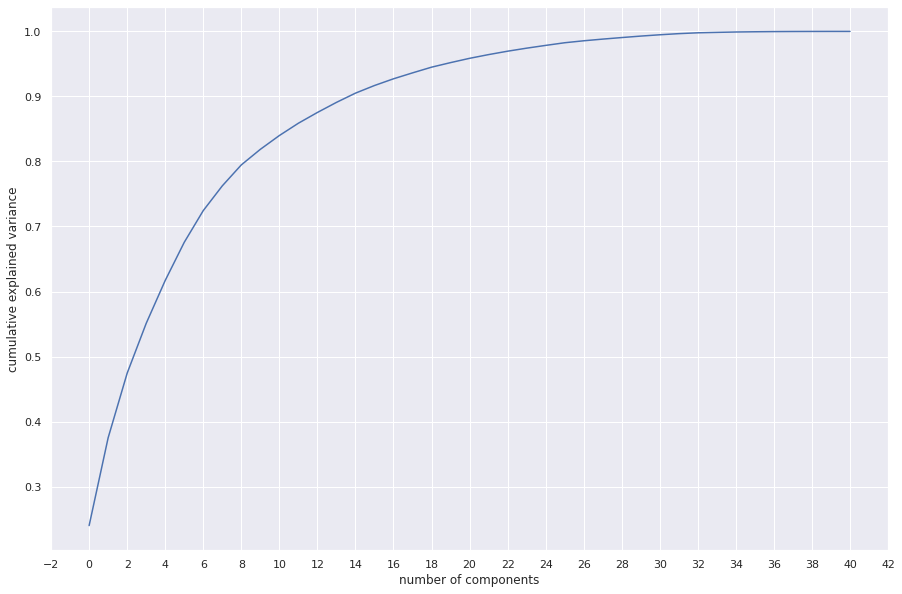

In [88]:
plt.plot(np.cumsum(pcafit.explained_variance_ratio_))
plt.locator_params(axis="x", nbins=len(pcafit.explained_variance_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

As you can see from the above graph, 28 components describe almost 98% of variance in features

In [89]:
np.round(pcafit.explained_variance_ratio_.reshape(-1,1) * 100,1)

array([[24. ],
       [13.5],
       [ 9.9],
       [ 7.7],
       [ 6.6],
       [ 5.9],
       [ 4.9],
       [ 3.8],
       [ 3.2],
       [ 2.4],
       [ 2.1],
       [ 1.9],
       [ 1.7],
       [ 1.5],
       [ 1.4],
       [ 1.2],
       [ 1. ],
       [ 0.9],
       [ 0.9],
       [ 0.7],
       [ 0.7],
       [ 0.6],
       [ 0.5],
       [ 0.5],
       [ 0.4],
       [ 0.4],
       [ 0.3],
       [ 0.3],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.2],
       [ 0.1],
       [ 0.1],
       [ 0.1],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ],
       [ 0. ]])

The above output indicates how much variance each component holds and the last 6 components hold no variance

In [90]:
dfx_pca = sklearn_pca.fit_transform(dfxz)
dfx_pca.shape

(5815, 41)

In [91]:
dfx_pca = pd.DataFrame(dfx_pca, columns=['pca0','pca1','pca2','pca3','pca4','pca5',
                                         'pca6','pca7','pca8','pca9','pca10','pca11',
                                         'pca12','pca13','pca14','pca15','pca16',
                                         'pca17','pca18','pca19','pca20','pca21','pca22',
                                         'pca23','pca24','pca25','pca26','pca27','pca28',
                                         'pca29','pca30','pca31','pca32','pca33',
                                         'pca34','pca35','pca36','pca37','pca38','pca39',
                                         'pca40'])

In [92]:
dfx_pca.head()

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33,pca34,pca35,pca36,pca37,pca38,pca39,pca40
0,0.366210,-0.349499,-0.102020,0.780367,0.269707,0.147461,0.185861,-0.242422,0.031686,0.189317,0.431744,-0.054013,0.030312,0.068096,-0.553516,-0.155570,-0.069551,0.215274,0.749904,0.083925,-0.076849,0.005792,-0.051353,0.004932,-0.090207,0.081946,0.104494,-0.034958,0.132712,0.018281,0.195995,0.944681,-0.141347,-0.074633,0.011333,0.066336,-0.024598,-0.001210,-0.007999,0.001638,0.002460
1,0.408029,-0.412888,-0.039906,0.847910,0.655343,0.137999,-0.269260,0.447165,0.301446,0.087384,0.240634,-0.063185,0.012755,0.131532,-0.475497,-0.146917,-0.109082,0.128174,0.772741,-0.035662,-0.080857,0.024751,-0.017801,-0.038239,-0.124807,0.088071,-0.054285,-0.091992,0.008998,0.029519,-0.014831,-0.000860,0.086220,-0.030269,0.020775,-0.009864,0.005288,-0.001440,-0.006953,-0.003139,-0.001730
2,0.170186,0.453668,-0.021364,0.953548,-0.750390,0.509379,-0.214638,0.075002,0.198566,0.124411,0.371153,-0.218146,-0.120708,0.259356,-0.488098,-0.125371,-0.004268,0.091287,0.610731,-0.083079,-0.253656,-0.033295,0.080778,0.011115,-0.148929,0.127572,-0.035037,-0.095848,-0.016320,0.038585,-0.091462,0.006450,0.009826,-0.045429,0.027644,-0.011926,0.002942,-0.000352,-0.009797,-0.000322,0.001726
3,0.159947,0.415113,-0.062655,0.962435,-0.738368,0.509778,-0.201313,0.059103,0.190020,0.121108,0.381433,-0.232964,-0.122002,0.251860,-0.492167,-0.115574,-0.015297,0.097840,0.596886,-0.096320,-0.299653,-0.044285,0.096167,0.025089,-0.153090,0.128944,-0.032941,-0.096591,-0.017744,0.044673,-0.119554,0.016822,0.013221,-0.037672,0.017780,-0.004580,-0.001060,0.000261,-0.010003,0.000137,0.002487
4,0.400322,-0.686074,0.469509,0.317842,-0.763885,0.570602,-0.154635,-0.026189,0.259144,0.065072,0.387507,-0.193431,-0.128539,0.164606,-0.545873,-0.122962,-0.014789,0.109121,0.622959,-0.093357,-0.248433,-0.058806,0.044984,0.009214,-0.122779,0.108772,-0.038962,-0.102394,-0.004563,0.035199,-0.075738,0.017184,0.022546,-0.053975,0.031181,-0.005647,0.001110,-0.000795,-0.008411,-0.001666,-0.000354


## 6.6 Multiple Linear Regression - Full Model - After PCA<a id="mod_pca"></a>

In [93]:
dfx_pca = sm.add_constant(dfx_pca)

In [94]:
X = dfx_pca[['const','pca0','pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11','pca12','pca13','pca14','pca15','pca16','pca17','pca18','pca19','pca20','pca21','pca22','pca23','pca24','pca25','pca26','pca27','pca28','pca29','pca30','pca31','pca32','pca33']]
X.head()

,const,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca14,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33
0,1.000000,0.366210,-0.349499,-0.102020,0.780367,0.269707,0.147461,0.185861,-0.242422,0.031686,0.189317,0.431744,-0.054013,0.030312,0.068096,-0.553516,-0.155570,-0.069551,0.215274,0.749904,0.083925,-0.076849,0.005792,-0.051353,0.004932,-0.090207,0.081946,0.104494,-0.034958,0.132712,0.018281,0.195995,0.944681,-0.141347,-0.074633
1,1.000000,0.408029,-0.412888,-0.039906,0.847910,0.655343,0.137999,-0.269260,0.447165,0.301446,0.087384,0.240634,-0.063185,0.012755,0.131532,-0.475497,-0.146917,-0.109082,0.128174,0.772741,-0.035662,-0.080857,0.024751,-0.017801,-0.038239,-0.124807,0.088071,-0.054285,-0.091992,0.008998,0.029519,-0.014831,-0.000860,0.086220,-0.030269
2,1.000000,0.170186,0.453668,-0.021364,0.953548,-0.750390,0.509379,-0.214638,0.075002,0.198566,0.124411,0.371153,-0.218146,-0.120708,0.259356,-0.488098,-0.125371,-0.004268,0.091287,0.610731,-0.083079,-0.253656,-0.033295,0.080778,0.011115,-0.148929,0.127572,-0.035037,-0.095848,-0.016320,0.038585,-0.091462,0.006450,0.009826,-0.045429
3,1.000000,0.159947,0.415113,-0.062655,0.962435,-0.738368,0.509778,-0.201313,0.059103,0.190020,0.121108,0.381433,-0.232964,-0.122002,0.251860,-0.492167,-0.115574,-0.015297,0.097840,0.596886,-0.096320,-0.299653,-0.044285,0.096167,0.025089,-0.153090,0.128944,-0.032941,-0.096591,-0.017744,0.044673,-0.119554,0.016822,0.013221,-0.037672
4,1.000000,0.400322,-0.686074,0.469509,0.317842,-0.763885,0.570602,-0.154635,-0.026189,0.259144,0.065072,0.387507,-0.193431,-0.128539,0.164606,-0.545873,-0.122962,-0.014789,0.109121,0.622959,-0.093357,-0.248433,-0.058806,0.044984,0.009214,-0.122779,0.108772,-0.038962,-0.102394,-0.004563,0.035199,-0.075738,0.017184,0.022546,-0.053975


In [95]:
y = data.CO2_Emissions

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_model_pca = sm.OLS(y_train, X_train).fit()
print(MLR_model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.628e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:02:13   Log-Likelihood:                -11690.
No. Observations:                4070   AIC:                         2.345e+04
Df Residuals:                    4035   BIC:                         2.367e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0378      0.067   3650.274      0.0

Interpretations:
    1. 99.3% of the variation in CO2 emissions is explained by the model .
    2. The Durbin-Watson test statistic is 2.053 and indicates that there is no auto-correlation
    3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.7 Feature Selection<a id="fea_sel"></a>

### 6.7.1 Forward Selection<a id="for_sel"></a>

In [97]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()
linreg_forward = sfs(estimator=linreg, k_features ='best', forward=True,
                     verbose=2, scoring='r2')

# fit the forward selection on training data using fit()
sfs_forward = linreg_forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.3s finished

[2021-07-19 09:02:16] Features: 1/35 -- score: 0.38824844313354195[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    0.4s finished

[2021-07-19 09:02:16] Features: 2/35 -- score: 0.7227919594103083[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.3s finished

[2021-07-19 09:02:16] Features: 3/35 -- score: 0.7801118306248915[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

In [98]:
# print the selected feature names when k_features = 12
print('Features selected using forward selection are: ')
print(sfs_forward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_forward.k_score_)

Features selected using forward selection are: 
('const', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9925559860700497


All features except pca_14 and pca_22 have been retained for the betterment of the model

### 6.7.2 Backward Elimination<a id="bac_eli"></a>

In [99]:
# initiate linear regression model to use in feature selection
linreg = LinearRegression()
linreg_backward = sfs(estimator = linreg, k_features ='best', forward = False,
                     verbose = 2, scoring = 'r2')

# fit the backward elimination on training data using fit()
sfs_backward = linreg_backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.2s finished

[2021-07-19 09:02:31] Features: 34/1 -- score: 0.9925538380888252[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    1.3s finished

[2021-07-19 09:02:32] Features: 33/1 -- score: 0.9925559860700497[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    0.6s finished

[2021-07-19 09:02:33] Features: 32/1 -- score: 0.9925559860700496[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [100]:
# print the selected feature names when k_features = 12
print('Features selected using backward elimination are: ')
print(sfs_backward.k_feature_names_)

# print the R-squared value
print('\nR-Squared: ', sfs_backward.k_score_)

Features selected using backward elimination are: 
('const', 'pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33')

R-Squared:  0.9925559860700497


Obtained similar results as that of Forward Selection where all features except pca_14 and pca_22 have been retained for the betterment of the model

## 6.8 Multiple Linear Regression - Full Model - After Feature Selection<a id="mod_fea_sel"></a>

In [101]:
X = dfx_pca[['const','pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8', 'pca9', 'pca10', 'pca11', 'pca12', 'pca13', 'pca15', 'pca16', 'pca17', 'pca18', 'pca19', 'pca20', 'pca21', 'pca23', 'pca24', 'pca25', 'pca26', 'pca27', 'pca28', 'pca29', 'pca30', 'pca31', 'pca32', 'pca33']]
X.head()

,const,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12,pca13,pca15,pca16,pca17,pca18,pca19,pca20,pca21,pca23,pca24,pca25,pca26,pca27,pca28,pca29,pca30,pca31,pca32,pca33
0,1.000000,0.366210,-0.349499,-0.102020,0.780367,0.269707,0.147461,0.185861,-0.242422,0.031686,0.189317,0.431744,-0.054013,0.030312,0.068096,-0.155570,-0.069551,0.215274,0.749904,0.083925,-0.076849,0.005792,0.004932,-0.090207,0.081946,0.104494,-0.034958,0.132712,0.018281,0.195995,0.944681,-0.141347,-0.074633
1,1.000000,0.408029,-0.412888,-0.039906,0.847910,0.655343,0.137999,-0.269260,0.447165,0.301446,0.087384,0.240634,-0.063185,0.012755,0.131532,-0.146917,-0.109082,0.128174,0.772741,-0.035662,-0.080857,0.024751,-0.038239,-0.124807,0.088071,-0.054285,-0.091992,0.008998,0.029519,-0.014831,-0.000860,0.086220,-0.030269
2,1.000000,0.170186,0.453668,-0.021364,0.953548,-0.750390,0.509379,-0.214638,0.075002,0.198566,0.124411,0.371153,-0.218146,-0.120708,0.259356,-0.125371,-0.004268,0.091287,0.610731,-0.083079,-0.253656,-0.033295,0.011115,-0.148929,0.127572,-0.035037,-0.095848,-0.016320,0.038585,-0.091462,0.006450,0.009826,-0.045429
3,1.000000,0.159947,0.415113,-0.062655,0.962435,-0.738368,0.509778,-0.201313,0.059103,0.190020,0.121108,0.381433,-0.232964,-0.122002,0.251860,-0.115574,-0.015297,0.097840,0.596886,-0.096320,-0.299653,-0.044285,0.025089,-0.153090,0.128944,-0.032941,-0.096591,-0.017744,0.044673,-0.119554,0.016822,0.013221,-0.037672
4,1.000000,0.400322,-0.686074,0.469509,0.317842,-0.763885,0.570602,-0.154635,-0.026189,0.259144,0.065072,0.387507,-0.193431,-0.128539,0.164606,-0.122962,-0.014789,0.109121,0.622959,-0.093357,-0.248433,-0.058806,0.009214,-0.122779,0.108772,-0.038962,-0.102394,-0.004563,0.035199,-0.075738,0.017184,0.022546,-0.053975


In [102]:
y = data.CO2_Emissions

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

MLR_full_model = sm.OLS(y_train, X_train).fit()
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:02:47   Log-Likelihood:                -11692.
No. Observations:                4070   AIC:                         2.345e+04
Df Residuals:                    4037   BIC:                         2.366e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0373      0.067   3649.549      0.0

Interpretations:
    1. 99.3% of the variation in CO2 emissions is explained by the model .
    2. The Durbin-Watson test statistic is 2.051 and indicates that there is no auto-correlation
    3. The Condition Number is 23.4 which suggests that there is no mutli-collinearity

## 6.9 Assumptions After Multiple Linear Regression Model<a id="ass_aft"></a>

### 6.9.1 Assumption #1: Linear Relationship Between Dependent and Independent Variable<a id="lr_dep_ind"></a>

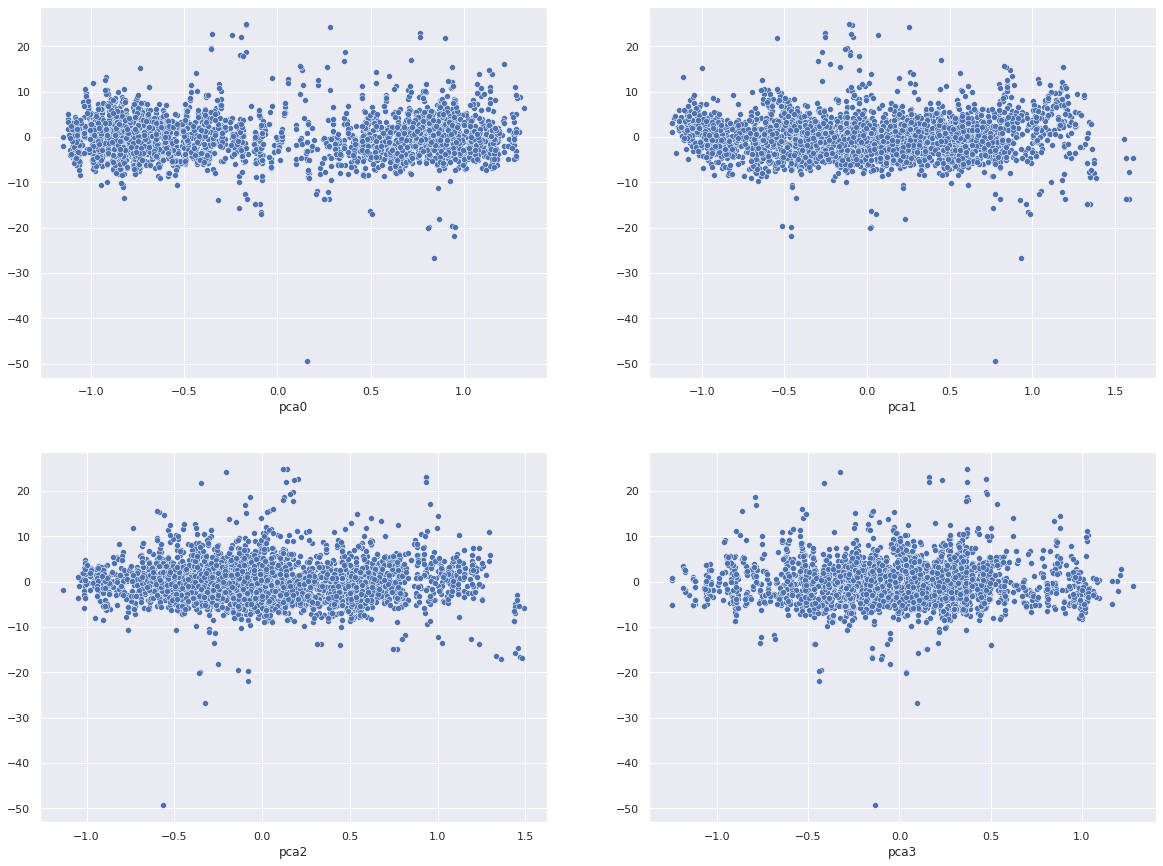

In [104]:
import seaborn as sns 
fig, ax = plt.subplots(nrows = 2, ncols= 2, figsize=(20, 15))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train.columns[1:5], ax.flatten()):
    sns.scatterplot(X_train[variable], MLR_full_model.resid , ax=subplot)

# display the plot
plt.show()

**Interpretation:** The above plots show no specific pattern, implies that there is a linearity present in the data.

### 6.9.2 Assumption #2: Checking for Autocorrelation<a id="che_aut_cor"></a>

In [105]:
# print the model summary
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:02:51   Log-Likelihood:                -11692.
No. Observations:                4070   AIC:                         2.345e+04
Df Residuals:                    4037   BIC:                         2.366e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0373      0.067   3649.549      0.0

**Interpretation:** From the above summary, I can observe that the value obtained from the `Durbin-Watson` test statistic is close to 2 (= 2.051). Thus, I conclude that there is no autocorrelation.

### 6.9.3 Assumption #3: Checking for Heteroskedasticity<a id="che_het"></a>

Breusch-Pagan is one of the tests for detecting heteroskedasticity in the residuals.<br>
The test hypothesis for the Breusch-Pagan test is given as:
<p style='text-indent:25em'> <strong> H<sub>o</sub>:  There is homoscedasticity present in the data </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  There is a heteroscedasticity present in the data </strong> </p>

In [106]:
# create vector of result parmeters
name = ['f-value','p-value']
test = sms.het_breuschpagan(MLR_full_model.resid, MLR_full_model.model.exog)
lzip(name, test[2:])

[('f-value', 23.4514020067169), ('p-value', 9.346814344089841e-125)]

**Interpretation:** I observe that the p-value is less than 0.05; thus, I conclude that there is heteroskedasticity present in the data.

### 6.9.4 Assumption #4: Tests for Normality<a id="tes_nor"></a>

#### 6.9.4.1 Q-Q Plot<a id="qq_plt"></a>

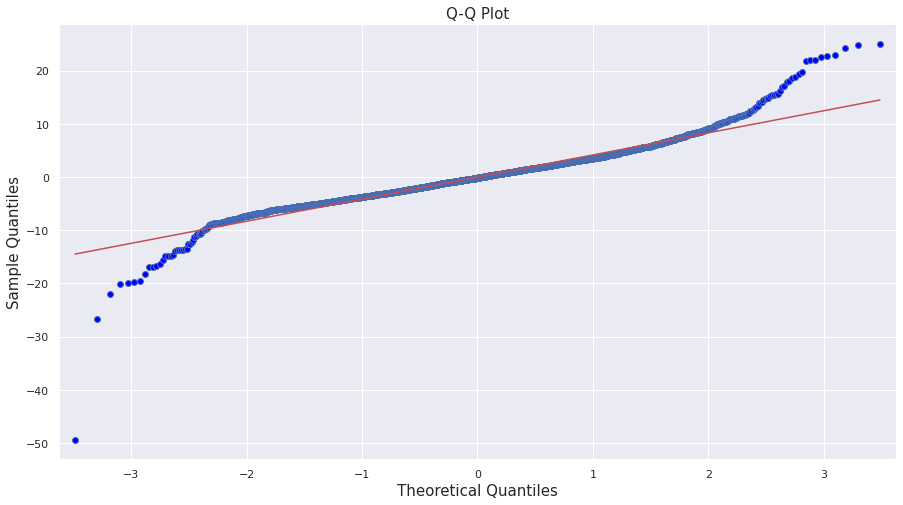

In [107]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# plot the Q-Q plot
# 'r' represents the regression line
qqplot(MLR_full_model.resid, line = 'r')

# set plot and axes labels
# set text size using 'fontsize'
plt.title('Q-Q Plot', fontsize = 15)
plt.xlabel('Theoretical Quantiles', fontsize = 15)
plt.ylabel('Sample Quantiles', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The diagonal line (red line) is the regression line and the blue points are the cumulative distribution of the residuals. As some of the points are not close to the diagonal line, I conclude that the residuals do not follow a `normal distribution`.

#### 6.9.4.2 Shapiro Wilk Test<a id="sha_wil_tes"></a>

The Shapiro Wilk test is used to check the normality of the residuals. The test hypothesis is given as:<br>

<p style='text-indent:25em'> <strong> H<sub>o</sub>:  Residuals are normally distributed </strong> </p>
<p style='text-indent:25em'> <strong> H<sub>1</sub>:  Residuals are not normally distributed </strong> </p>

In [108]:
stat, p_value = shapiro(MLR_full_model.resid)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.941531777381897
P-Value: 2.1534284873657136e-37


**Interpretation:** From the above test I can see that the p-value is 2.153e-37 (less than 0.05), thus I can say that the residuals are not normally distributed.

# 7. Model Evaluation<a id="mod_eva"></a>

## 7.1 Measures of Variation<a id="mea_var"></a>

In [109]:
y_train_pred = MLR_full_model.predict(X_train) 
y_train_pred.head()

5435   275.513937
5690   229.370306
187    209.758702
1393   173.802983
1980   226.595181
dtype: float64

In [110]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_pred - y_train.mean())**2)
print('Sum of Squared Regression:',ssr)

Sum of Squared Regression: 10212989.189658152


In [111]:
# calculate the SSE on train dataset
sse = np.sum((y_train - y_train_pred)**2)
print('Sum of Squared Error:',sse)

Sum of Squared Error: 74536.30641064301


In [112]:
# calculate the SST on train dataset
sst = np.sum((y_train - y_train.mean())**2)
print('Sum of Sqaured Total:',sst)

Sum of Sqaured Total: 10287525.496068794


In [113]:
print('Sum of SSR and SSE is:',ssr+sse)

Sum of SSR and SSE is: 10287525.496068794


**Interpretation:** From the above output, I can verify that SST (Total variation) is the sum of SSR and SSE.

In [114]:
r_sq =MLR_full_model.rsquared

# print the R-squared value
print('R Squared is:',r_sq)

R Squared is: 0.9927546904803176


In [115]:
see = np.sqrt(sse/(len(X_train) - 2))    
print("The standard error of estimate:",see)

The standard error of estimate: 4.280489753481088


## 7.2 Inferences about Intercept and Slope<a id="inf_int_slo"></a>

In [116]:
MLR_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:03:04   Log-Likelihood:                -11692.
No. Observations:                4070   AIC:                         2.345e+04
Df Residuals:                    4037   BIC:                         2.366e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0373      0.067   3649.549      0.000     245.905     246.170
pca0          15.4541      0.086    180.195      0.000      15.286      15.622
pca1          52.7577      0.114    463.297      0.000      52.534      52.981
pca2          57.6704      0.134    431.092      0.000      57.408      57.933
pca3         -11.0560      0.152    -72.819      0.000     -11.354     -10.758
pca4         -16.1502      0.165    -98.175      0.000     -16.473     -15.828
pca5          -5.8438      0.175    -33.483      0.000      -6.186      -5.502
pca6         -15.4874      0.190    -81.709      0.000     -15.859     -15.116
pca7          33.0433      0.215    153.364      0.000      32.621      33.466
pca8         -15.2819      0.235    -65.102      0.000     -15.742     -14.822
pca9         -27.4233      0.272   -100.868      0.000     -27.956     -26.890
pca10          4.2703      0.286     14.933      0.000       3.710       4.831
pca11         -4.1625      0.303    -13.728      0.000      -4.757      -3.568
pca12        -24.8231      0.323    -76.905      0.000     -25.456     -24.190
pca13         20.7524      0.340     61.027      0.000      20.086      21.419
pca15        -17.7795      0.386    -46.088      0.000     -18.536     -17.023
pca16         15.7465      0.414     38.049      0.000      14.935      16.558
pca17        -11.0209      0.450    -24.474      0.000     -11.904     -10.138
pca18         11.4803      0.441     26.030      0.000      10.616      12.345
pca19          9.8237      0.495     19.857      0.000       8.854      10.794
pca20         54.5629      0.515    105.872      0.000      53.552      55.573
pca21          7.6590      0.552     13.880      0.000       6.577       8.741
pca23         -1.4556      0.590     -2.466      0.014      -2.613      -0.298
pca24         -3.6968      0.647     -5.717      0.000      -4.964      -2.429
pca25          5.0562      0.660      7.662      0.000       3.762       6.350
pca26          8.2748      0.754     10.975      0.000       6.797       9.753
pca27        -26.6400      0.815    -32.699      0.000     -28.237     -25.043
pca28          4.4828      0.846      5.300      0.000       2.825       6.141
pca29        -32.4709      0.934    -34.752      0.000     -34.303     -30.639
pca30        144.4958      0.919    157.159      0.000     142.693     146.298
pca31        -42.9065      1.007    -42.621      0.000     -44.880     -40.933
pca32          4.3453      1.180      3.682      0.000       2.032       6.659
pca33         44.4940      1.575     28.259      0.000      41.407      47.581
==============================================================================
Omnibus:                      628.495   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10675.916
Sk

In [117]:
t_intercept =MLR_full_model.params[0] / MLR_full_model.bse[0]
print('t intercept:',t_intercept)

t intercept: 3649.5493094840404


In [118]:
t_coeff1 =MLR_full_model.params[1] / MLR_full_model.bse[1]
print('t coeff:',t_coeff1)

t coeff: 180.19453678077804


In [119]:
# calculate p-value for intercept
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for intercept
# degrees of freedom = n - 1 = 4070 - 1 = 4069
pval = stats.t.sf(np.abs(t_intercept), 4069)*2 
print('p val for intercept:',pval)

p val for intercept: 0.0


In [120]:
# calculate p-value for slope
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for slope
# degrees of freedom = n - 1 = 4070 - 1 = 4069
pval = stats.t.sf(np.abs(t_coeff1),4069)*2 
print('p val for slope:',pval)

p val for slope: 0.0


## 7.3 Confidence Interval for Intercept and Slope<a id="con_int_slo"></a>

In [121]:
# CI for intercept
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_inter_min, CI_inter_max = MLR_full_model.params[0] - (1.9622*MLR_full_model.bse[0]), MLR_full_model.params[0] + (1.9622*MLR_full_model.bse[0])

# print the confidence interval for intercept 
print('CI for intercept:', [CI_inter_min , CI_inter_max])

CI for intercept: [245.90504977120148, 246.16961638698237]


In [122]:
# CI for slope
# create a tuple using the above formula
# here, t_table_value = 1.9622
CI_coeff1_min, CI_coeff1_max = MLR_full_model.params[1] - (1.9622*MLR_full_model.bse[1]), MLR_full_model.params[1] + (1.9622*MLR_full_model.bse[1])

# print the confidence interval for slope
print('CI for coeff1:', [CI_coeff1_min, CI_coeff1_max])

CI for coeff1: [15.285817348063087, 15.622387370564237]


## 7.4 Compare Regression Results<a id="com_reg_res"></a>

In [123]:
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:          CO2_Emissions   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.729e+04
Date:                Mon, 19 Jul 2021   Prob (F-statistic):               0.00
Time:                        09:03:10   Log-Likelihood:                -11692.
No. Observations:                4070   AIC:                         2.345e+04
Df Residuals:                    4037   BIC:                         2.366e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        246.0373      0.067   3649.549      0.0

In [124]:
r_sq_mlr = MLR_full_model.rsquared

# print the value
print('r square in regression model:',r_sq_mlr)

r square in regression model: 0.9927546904803176


**Interpretation:** The value of R-squared is 0.993. Thus, I conclude that the 99.3% variation in the CO2_Emissions is explained by the model. I can also obtain this value from the summary of the model.

In [125]:
# calculate adjusted R-Squared on train dataset
# use 'rsquared_adj' from statsmodel
adj_r_sq = MLR_full_model.rsquared_adj

# print the value
print('Adjusted r square for regression model:',adj_r_sq)

Adjusted r square for regression model: 0.9926972592431044


**Interpretation:** I can see that the value of adjusted R-squared calculated using the formula and the one obtained from the model are nearly same. I can also obtain this value from the summary of the model.

Overall F-Test & p-value of the Model

In [126]:
# compute f_value using the below formula 
# f_value = (r_sq / k-1)/((1- r_sq)/n-k)

# k = number of beta coefficients
k = len(X_train.columns)

# n = number of observations
n = len(X_train)

# calculate value of F-statistic
# 'r_sq_mlr' represents the R-Squared value
f_value = (r_sq_mlr / (k - 1))/((1-r_sq_mlr)/(n - k))

# print the value
print('f value for regression model:',f_value)

f value for regression model: 17285.97081748936


In [127]:
# degrees of freedom 
# dfn = k-1 = 32-1 = 31
# dfd = n-k = 4396-32 = 4364
p_val = stats.f.sf(f_value, dfn = 31, dfd = 4364)

# print the value
print('p value for regression model:',p_val)

p value for regression model: 0.0


**Interpretation:** As, the p-value is less than 0.05, I accept the alternate hypothesis; i.e. the model is significant.

# 8. Model Performance<a id="mod_per"></a>

In [128]:
train_pred = MLR_full_model.predict(X_train)
test_pred = MLR_full_model.predict(X_test)

In [129]:
train_pred.head()

5435   275.513937
5690   229.370306
187    209.758702
1393   173.802983
1980   226.595181
dtype: float64

In [130]:
test_pred.head()

1605   212.002843
5149   311.038411
2580   256.796355
204    229.853783
311    224.684951
dtype: float64

## 8.1 Mean Squared Error (MSE)<a id="mse"></a>

In [131]:
mse_train = round(mean_squared_error(y_train, train_pred),4)

# print the MSE for the training set
print("Mean Squared Error (MSE) on training set: ", mse_train)

# calculate the MSE for the test data
# round the value upto 4 digits using 'round()'
mse_test = round(mean_squared_error(y_test, test_pred),4)

# print the MSE for the test set
print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  18.3136
Mean Squared Error (MSE) on test set:  17.3466


## 8.2 Root Mean Squared Error (RMSE)<a id="rmse"></a>

In [132]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  4.2794
Root Mean Squared Error (RMSE) on test set:  4.1649


## 8.3 Mean Absolute Error (MAE)<a id="mae"></a>

In [133]:
# calculate the MAE using the "mean_absolute_error" function

# calculate the MAE for the train data
# round the value upto 4 digits using 'round()'
mae_train = round(mean_absolute_error(y_train, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  3.1201
Mean Absolute Error (MAE) on test set:  3.0347


## 8.4 Mean Absolute Percentage Error (MAPE)<a id="mape"></a>

In [134]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [135]:
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  1.3187
Mean Absolute Percentage Error (MAPE) on test set:  1.2655


## 8.5 Resultant Table<a id="res_tab"></a>

In [136]:
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

result_table = pd.DataFrame(columns = cols)

In [137]:
from statsmodels.tools.eval_measures import rmse

MLR_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': MLR_full_model.rsquared,
                     'Adj. R-squared': MLR_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test, test_pred),
                     'RMSE': rmse(y_test, test_pred),
                     'MAE': mean_absolute_error(y_test, test_pred),
                     'MAPE': mape(y_test, test_pred)
                   })

result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,0.992755,0.992697,17.346594,4.164924,3.034658,1.265550


# 9. Model Optimization<a id="mod_opt"></a>

## 9.1 BIAS <a id="bias"></a>

<AxesSubplot:ylabel='CO2_Emissions'>

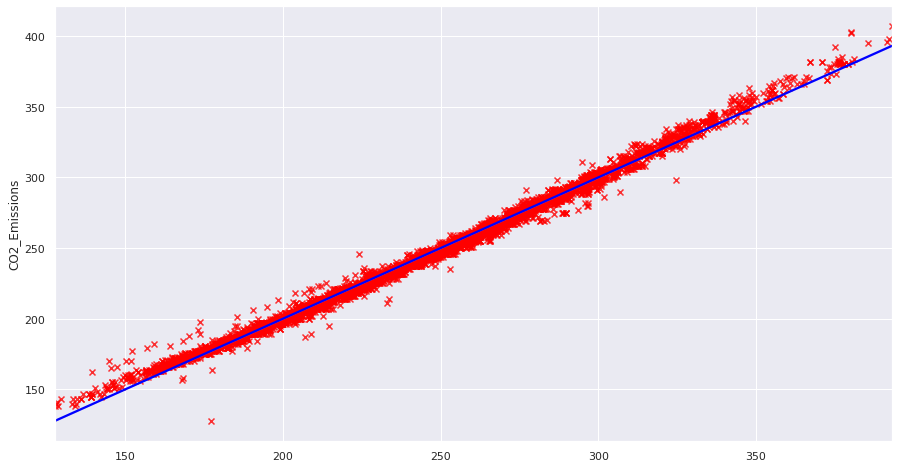

In [138]:
sns.regplot(y = y_train,x = train_pred,color='red',line_kws={'color':'blue'},marker='x')

## 9.2 VARIANCE<a id="var"></a>

In [139]:
a = np.random.randint(1,4070,1745)
train_pred1 = list(train_pred)
TrainPred2 = []

In [140]:
for i in a:
    TrainPred2.append(train_pred1[i])

<AxesSubplot:>

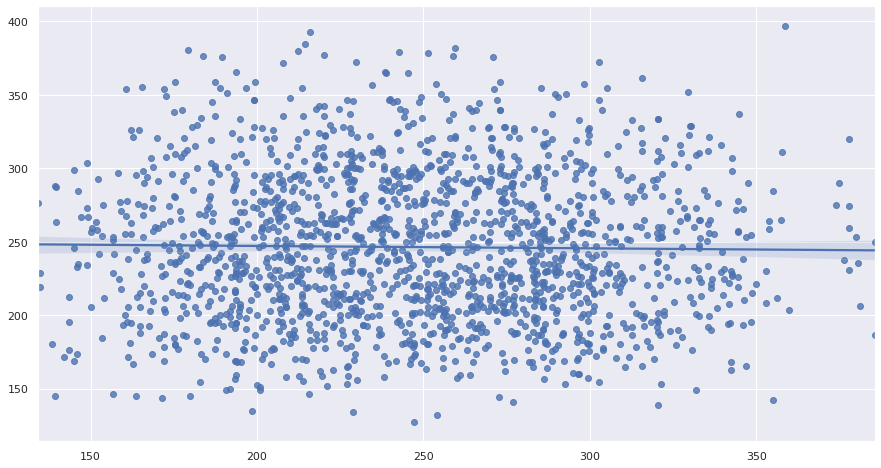

In [141]:
sns.regplot(y = test_pred,x = TrainPred2)

<b> INTERPRETATION</b>: The bias is low and variance is high, hence I assume that the model is a complex one. I will have to employ optimization techniques to reduce the complexity and RMSE.

# 9.3. MODEL VALIDATION<a id="mod_val"></a>

## 9.3.1 Cross Validation<a id="cro_val"></a>

In [142]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits = 10)

In [143]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)
    return model.score(X_test_k, y_test_k)  

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [145]:
from sklearn.linear_model import LinearRegression

scores = []
 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
 
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
print('All scores: ', scores)

print("\nMinimum score obtained: ", round(min(scores), 4))

print("Maximum score obtained: ", round(max(scores), 4))

print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.9923706905529478, 0.9936671079148296, 0.9918270363993443, 0.9938653440254205, 0.992745315943046, 0.9916744367221197, 0.9918431066483061, 0.9916602024646096, 0.992888297770757, 0.9928070240649963]

Minimum score obtained:  0.9917
Maximum score obtained:  0.9939
Average score obtained:  0.9925


In [146]:
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 10, 
                         scoring = 'r2')

In [147]:
print('All scores: ', scores)

print("\nMinimum score obtained: ", round(min(scores), 4))

print("Maximum score obtained: ", round(max(scores), 4))

print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.99237069 0.99366711 0.99182704 0.99386534 0.99274532 0.99167444
 0.99184311 0.9916602  0.9928883  0.99280702]

Minimum score obtained:  0.9917
Maximum score obtained:  0.9939
Average score obtained:  0.9925


**The R2 value is similar to the one obtained in the MLR model. There are no significant changes.**

## 9.3.2 Leave Out One Cross Validation(LOOCV)<a id="loocv"></a>

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [149]:
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                              
    return model.score(X_test_k, y_test_k)

In [150]:
loocv_rmse = []
loocv = LeaveOneOut()

for train_index, test_index in loocv.split(X_train):

    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    linreg = LinearRegression()
    linreg.fit(X_train_l, y_train_l)
 
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    rmse = np.sqrt(mse)
    
    loocv_rmse.append(rmse)

In [151]:
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))
 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0009
Maximum rmse obtained:  50.0198
Average rmse obtained:  3.1232


# 9.4 GRADIENT DESCENT<a id="gra_des"></a>

In [152]:
def get_train_rmse(model):

    train_pred = model.predict(X_train)

    mse_train = mean_squared_error(y_train, train_pred)

    rmse_train = round(np.sqrt(mse_train), 4)

    return(rmse_train)

In [153]:
def get_test_rmse(model):

    test_pred = model.predict(X_test)

    mse_test = mean_squared_error(y_test, test_pred)

    rmse_test = round(np.sqrt(mse_test), 4)

    return(rmse_test)

In [154]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(random_state = 10)

linreg_with_SGD = sgd.fit(X_train, y_train)

print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 4.3111
RMSE on test set: 4.2553


In [155]:
def plot_coefficients(model, algorithm_name):

    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)

    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    plt.ylabel('Features', fontsize = 15)

In [156]:
MLR_model = linreg.fit(X_train, y_train)

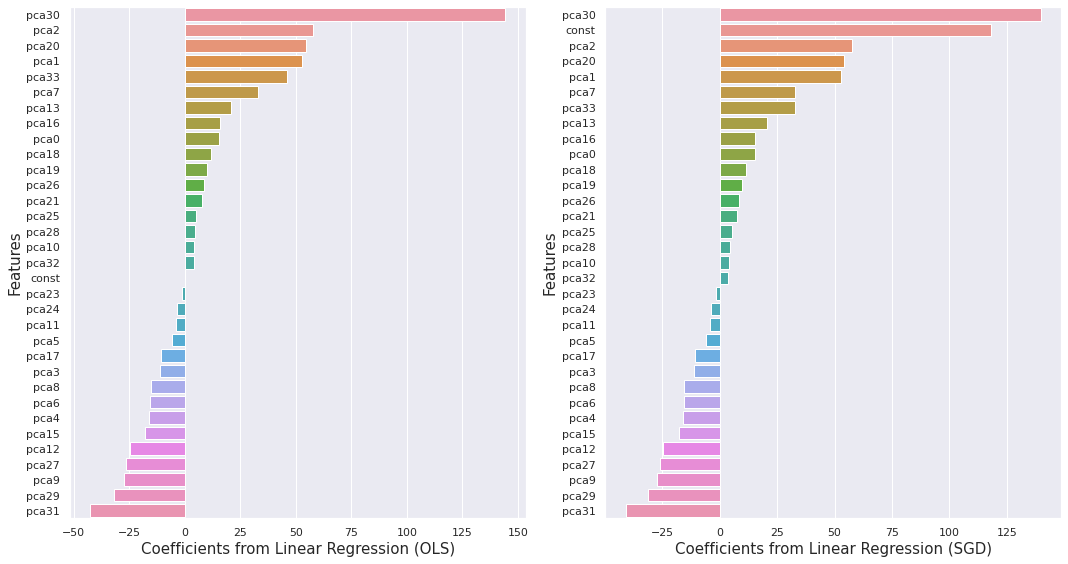

In [157]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(linreg_with_SGD, 'Linear Regression (SGD)')

plt.tight_layout()

In [158]:
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE', 'Test_MAPE'])

In [159]:
def get_test_mape(model):

    test_pred = model.predict(X_test)

    mape_test = mape(y_test, test_pred)

    return(mape_test)

In [160]:
def get_score(model):
    
    r_sq = model.score(X_train, y_train)

    n = X_train.shape[0]

    k = X_train.shape[1]

    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    return ([r_sq, r_sq_adj])

In [161]:
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    global score_card
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model),
                       'Train_RMSE': get_train_rmse(model),
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [162]:
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447


# 9.5  Regularization<a id="reg"></a>

## 9.5.1 Ridge Regression Model<a id="ridge"></a>

In [163]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [164]:
ridge = Ridge(alpha = 0.1, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.1712


In [165]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 0.1)', model = ridge, alpha = 0.1)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921


In [166]:
ridge = Ridge(alpha = 1, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', np.round(get_test_rmse(ridge),2))

RMSE on test set: 4.23


In [167]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 1)', model = ridge, alpha = 1)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208


In [168]:
ridge = Ridge(alpha = 2, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.3231


In [169]:
update_score_card(algorithm_name='Ridge Regression (with alpha = 2)', model = ridge, alpha = 2)

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860


In [170]:
ridge = Ridge(alpha = 0.5, max_iter = 500)

ridge.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(ridge))

RMSE on test set: 4.1904


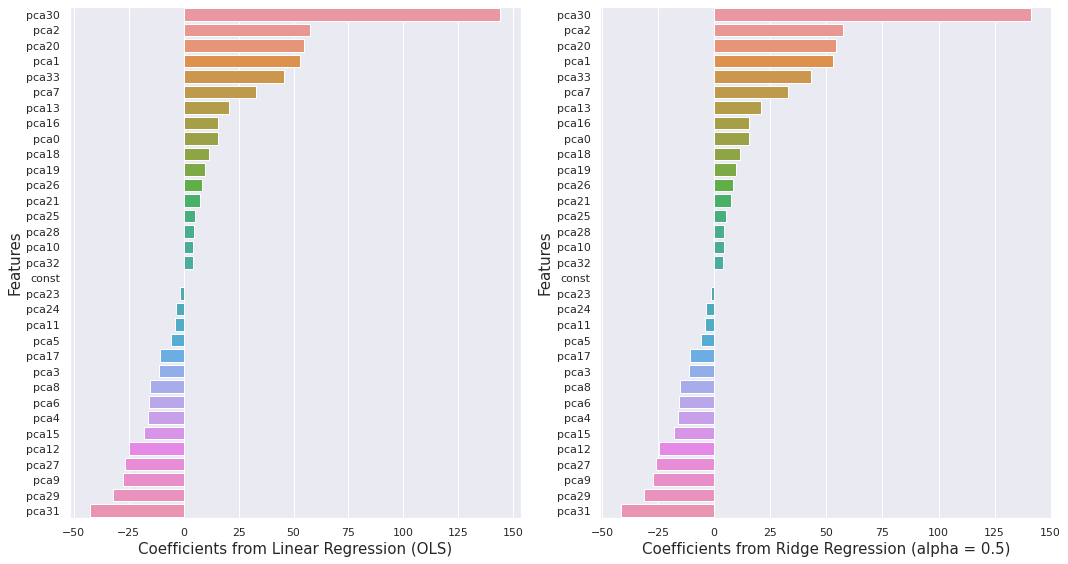

In [171]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(ridge, 'Ridge Regression (alpha = 0.5)')

plt.tight_layout()

<b>Interpretation:</b> The coefficients obtained from ridge regression have similar values as compared to the coefficients obtained from linear regression using OLS.

## 9.5.2 Lasso Regression Model<a id="lasso"></a>

In [172]:
lasso = Lasso(alpha = 0.01, max_iter = 500)

lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 4.2237


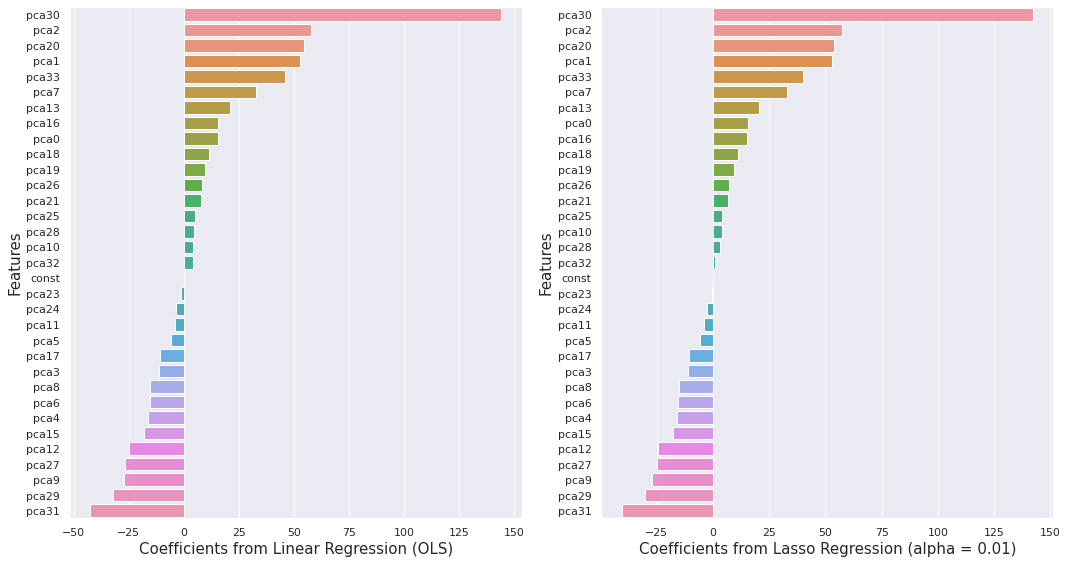

In [173]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.01)')

plt.tight_layout()

In [174]:
lasso = Lasso(alpha = 0.05, max_iter = 500)

lasso.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(lasso))

RMSE on test set: 4.8908


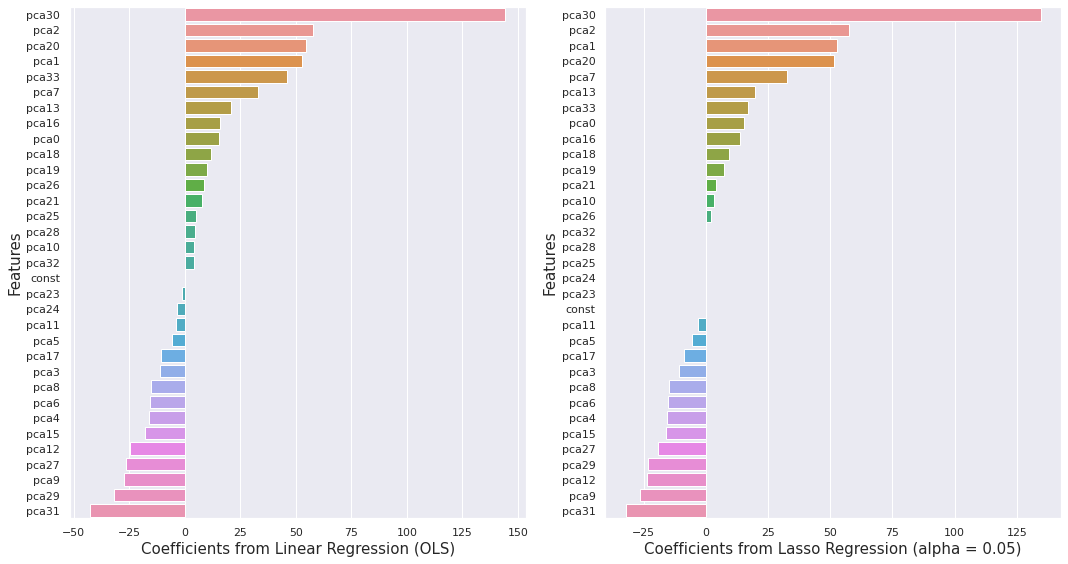

In [175]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(lasso, 'Lasso Regression (alpha = 0.05)')

plt.tight_layout()

<b>Interpretation</b>: The second subplot (on the right) shows that the lasso regression have reduced the coefficients of some variables to zero.

In [176]:
df_lasso_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': lasso.coef_})

print('Insignificant variables obtained from Lasso Regression when alpha is 0.05')
df_lasso_coeff.Variable[df_lasso_coeff.Coefficient == 0].to_list()

Insignificant variables obtained from Lasso Regression when alpha is 0.05


['const', 'pca23', 'pca24', 'pca25', 'pca28', 'pca32']

In [177]:
update_score_card(algorithm_name = 'Lasso Regression', model = lasso, alpha = '0.05')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353


## 9.5.3 Elastic-Net Regression Model<a id="ela_net"></a>

In [178]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.55, max_iter = 500)

enet.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 15.8972


In [179]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.55')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451


In [180]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.1, max_iter = 500)

enet.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 19.6548


In [181]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.1')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
6,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953


In [182]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

enet.fit(X_train, y_train)

print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 20.2869


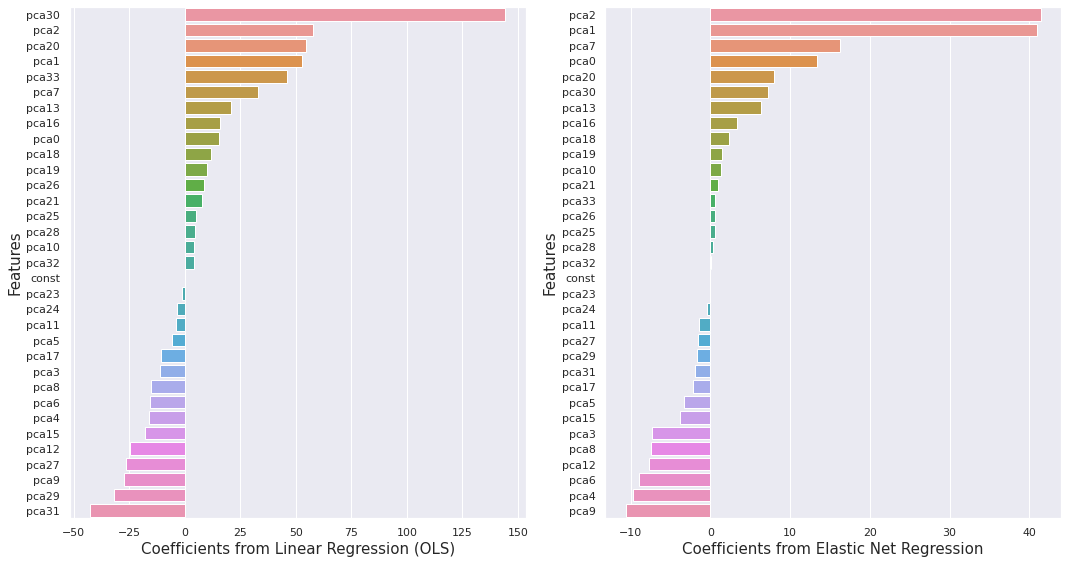

In [183]:
plt.subplot(1,2,1)
plot_coefficients(MLR_model, 'Linear Regression (OLS)')

plt.subplot(1,2,2)
plot_coefficients(enet, 'Elastic Net Regression')

plt.tight_layout()

<b>Interpretation</b>: The second subplot (on the right) shows that the elastic-net regression has reduced the coefficients of some variables to zero.

In [184]:
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
6,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953
7,Elastic Net Regression,0.1,0.01,0.842247,0.841120,19.880700,20.286900,6.365859


## 9.5.4 Grid Search CV<a id="gri_sea"></a>

In [185]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
ridge = Ridge()

ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

ridge_grid.fit(X_train, y_train)

print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 0.1} 

RMSE on test set: 4.1712


In [186]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
6,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953
7,Elastic Net Regression,0.1,0.01,0.842247,0.841120,19.880700,20.286900,6.365859
8,Ridge Regression (using GridSearchCV),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921


In [187]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
 
lasso = Lasso()

lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

lasso_grid.fit(X_train, y_train)

print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.001} 

RMSE on test set: 4.1705


In [188]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
6,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953
7,Elastic Net Regression,0.1,0.01,0.842247,0.841120,19.880700,20.286900,6.365859
8,Ridge Regression (using GridSearchCV),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
9,Lasso Regression (using GridSearchCV),0.001000,-,0.992749,0.992697,4.262300,4.170500,1.244845


In [189]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2, 0.4, 0.55]}]

enet = ElasticNet()

enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

enet_grid.fit(X_train, y_train)

print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.55} 

RMSE on test set: 4.1758


In [190]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
3,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
4,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
5,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
6,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953
7,Elastic Net Regression,0.1,0.01,0.842247,0.841120,19.880700,20.286900,6.365859
8,Ridge Regression (using GridSearchCV),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
9,Lasso Regression (using GridSearchCV),0.001000,-,0.992749,0.992697,4.262300,4.170500,1.244845


# 10. Displaying score summary<a id="dis_sco_sum"></a>

In [191]:
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE,Test_MAPE
0,Lasso Regression (using GridSearchCV),0.001000,-,0.992749,0.992697,4.262300,4.170500,1.244845
1,Ridge Regression (with alpha = 0.1),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
2,Ridge Regression (using GridSearchCV),0.100000,-,0.992749,0.992697,4.262300,4.171200,1.244921
3,Elastic Net Regression (using GridSearchCV),0.000100,0.550000,0.992745,0.992693,4.263500,4.175800,1.244648
4,Ridge Regression (with alpha = 1),1,-,0.992648,0.992596,4.291800,4.225100,1.247208
5,Linear Regression (using SGD),-,-,0.992582,0.992529,4.311100,4.255300,1.265447
6,Ridge Regression (with alpha = 2),2,-,0.992380,0.992326,4.369400,4.323100,1.261860
7,Lasso Regression,0.05,-,0.990574,0.990507,4.859700,4.890800,1.399353
8,Elastic Net Regression,0.1,0.55,0.902194,0.901495,15.654000,15.897200,4.797451
9,Elastic Net Regression,0.1,0.1,0.851800,0.850741,19.269400,19.654800,6.137953


Interpretation: I can see that Lasso Regression (using GridSearchCV) has the lowest test RMSE.

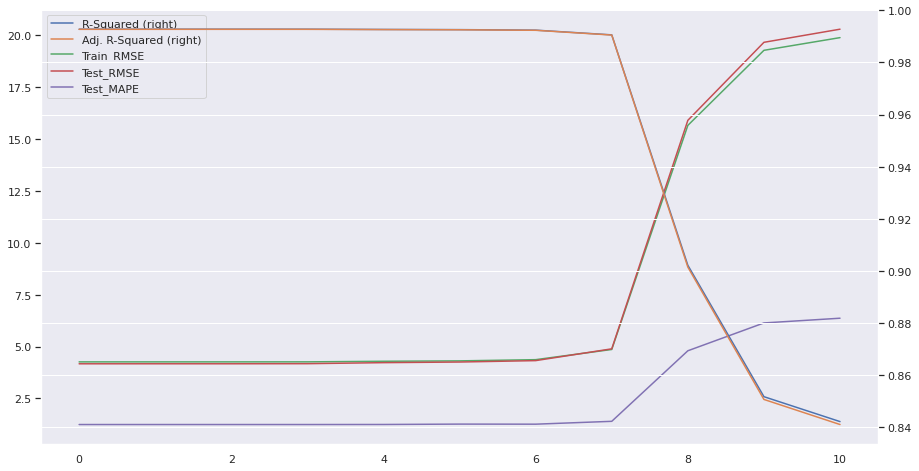

In [192]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. 
The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.
Findings suggest that the Lasso Regression (using GridSearchCV) has the highest accuracy with lowest RMSE. Finally, it can be concluded that the Lasso Regression (using GridSearchCV) can be used to predict the amount of carbon dioxide emissions.

# 11. Conclusion<a id="conclu"></a>

**Of all the optimization techniques used, I see that Lasso Regression using Grid search CV has been the most effective in reducing RMSE . the exact combination of features responsible for high CO2 emissions cannot be predicted  Since all the features are highly correlated . I can hereby conclude that I have successfully built a model that can predict amount of CO2 Emissions across different vehicle types at a high accuracy rate.**

# 12.Deployment<a id="deploy"></a>

https://coemission.herokuapp.com/

# 13. References<a id="Refer"></a>

https://reader.elsevier.com/reader/sd/pii/S2352484719301088?token=807922D7C5CF2E7E78C846212A5D7F97FFCC0B513EDBEAAC2626D7FB0DBE7EFE67FEBE723E7610FC62CA1FA0F5B5110A&originRegion=eu-west-1&originCreation=20210510125616

https://sci-hub.se/https://ieeexplore.ieee.org/abstract/document/7984819

https://scihub.se/https://www.sciencedirect.com/science/article/abs/pii/S0959652620329875

<table align="center" width=100%>
    <tr>
        <td width="30%">
            <img src="https://i.pinimg.com/originals/60/00/50/600050674a955d69dc5930c45321be30.gif">
        </td>
        <td>
            <div align="center">
                <font color="#208807 " size=24px>
                    <b>Thank You.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>